# EXPLORATORY DATA ANALYSIS - LOAN DEFAULTER DATASET

<a id='contents'></a>

## Contents

<br>1. [Importing the Required Libraries](#libraries)<br>2. [Loading the Data](#data)<br>3. [Data Analysis](#analysis)<br>4. [Missing Value Analysis](#nulls)<br>5. [Error Value Analysis](#errors)<br>6. [Error Value Correction](#errcorr)<br>7. [Missing Value Imputation](#imputation)<br>8. [Univariate and Outlier Analysis of Numerical Variables](#outliers)<br>9. [Outlier Removal](#winsorizer)<br>10. [Univariate Analysis of Categorical Variables](#uni_cat)<br>11. [Bivariate Analysis of Categorical Variables](#bivar_cat)<br>12. [Bivariate Analysis of Numerical Variables](#bivar_num)<br>13. [Summary](#summary)

<a id='libraries'></a>

## Importing the Required Libraries

In [1]:
# basic analysis library
import sys
import numpy as np
import pandas as pd

# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.subplots import make_subplots
from plotly import graph_objects as go
sns.set()

# enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
cf.set_config_file(world_readable = True, theme = 'pearl')

# feature engineering libraries
from feature_engine import imputation as imp
from feature_engine import outliers as outr
from sklearn.pipeline import Pipeline

# enabling display of complete array/dataframe/series
np.set_printoptions(threshold = sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

print('All Required Libraries Imported')

All Required Libraries Imported


[Back to Contents](#contents)

<a id='data'></a>

## Loading the Data

In [2]:
# read the data
data = pd.read_csv('application_data.csv')
print(data.shape)
data.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

[Back to Contents](#contents)

<a id='analysis'></a>

## Data Analysis

#### Let us first check the number of numerical and categorical variables.

In [3]:
# classification of variables
numerical = [var for var in data.columns if data[var].dtype != 'O']
categorical = [var for var in data.columns if data[var].dtype == 'O']
print('There are', len(numerical), 'numerical variables')
print('There are', len(categorical), 'categorical variables')

There are 106 numerical variables
There are 16 categorical variables


In [4]:
# summary statistics of all the numeric columns in the dataset
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
# datatypes of each column
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Now that we have analyzed the data, let us check the number of null values in the dataset.

In [6]:
# null Values in data
sum_null = data.isnull().sum()
mean_null = data.isnull().mean()
nulls = pd.concat([sum_null, mean_null], axis = 1)
nulls.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
nulls

,count,percentage
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.000039


#### A lot of variables have null values, 

In [7]:
# count of variables with null values
nulls[nulls['count'] > 0].count()

count         67
percentage    67
dtype: int64

#### There are 67 variables which have null values. Let us have a look at the variables which have null values greater than 35%.

In [8]:
# null Values more than 30%
more_nulls = nulls[nulls['percentage'] > 0.35]
print(len(more_nulls))
more_nulls

49


,count,percentage
OWN_CAR_AGE,202929,0.659908
EXT_SOURCE_1,173378,0.563811
APARTMENTS_AVG,156061,0.507497
BASEMENTAREA_AVG,179943,0.585160
YEARS_BEGINEXPLUATATION_AVG,150007,0.487810
YEARS_BUILD_AVG,204488,0.664978
COMMONAREA_AVG,214865,0.698723
ELEVATORS_AVG,163891,0.532960
ENTRANCES_AVG,154828,0.503488
FLOORSMAX_AVG,153020,0.497608


In [9]:
# plot for null values > 35%
more_nulls['count'].sort_values(ascending = False).iplot(kind = 'bar', xTitle = 'Columns', yTitle = 'Count', title = 'List of Columns & NA counts where NA values are more than 35%')

#### The above mentioned columns have null values more than 35%. Since this would affect our analysis, we can drop these columns.

In [10]:
# copy of original data
df = data.copy()

# dropping columns with null values more than 35%
df.drop(more_nulls.index, axis = 1, inplace = True)
print(df.shape)
df.head()

(307511, 73)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now that we have dropped the columns which have null values greater than 35%, let us have a look at the remaining columns which we arw going to analyze.

In [11]:
# null values in new data
sum_null_new = df.isnull().sum()
mean_null_new = df.isnull().mean()
nulls_new = pd.concat([sum_null_new, mean_null_new], axis = 1)
nulls_new.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
print(nulls_new[nulls_new['count'] > 0]['count'].count())
nulls_new[nulls_new['count'] > 0]

18


,count,percentage
AMT_ANNUITY,12,0.000039
AMT_GOODS_PRICE,278,0.000904
NAME_TYPE_SUITE,1292,0.004201
OCCUPATION_TYPE,96391,0.313455
CNT_FAM_MEMBERS,2,0.000007
EXT_SOURCE_2,660,0.002146
EXT_SOURCE_3,60965,0.198253
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320


#### So there are 18 variables which have null values. We need to thoroughly analyze these variables to find a suitable imputation technique.

[Back to Contents](#contents)

<a id='nulls'></a>

## Missing Value Analysis

#### We will analyze each column on its statistics to find out a suitable imputation technique.

### AMT_ANNUITY

In [12]:
# missing values in AMT_ANNUITY column
print(df['AMT_ANNUITY'].isnull().sum())
print(df['AMT_ANNUITY'].isnull().mean())

12
3.9022994299390916e-05


In [13]:
# statistics of AMT_ANNUITY
print(df['AMT_ANNUITY'].describe())

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


#### For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903.0'

#### Since there are many rows, scrolling above and below gets difficult and tedious, so on every step we record our observations in a dataframe so that it would be easy for framing the imputation code.

In [14]:
# dataframe for holding imputation technique for each column
imp_method = pd.DataFrame(nulls_new[nulls_new['count'] > 0].index).rename(columns = {0:'Column'})

# setting default technique as 'Median'
imp_method['Imputation'] = 'Median'
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Median
3,OCCUPATION_TYPE,Median
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Median
6,EXT_SOURCE_3,Median
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### AMT_GOODS_PRICE

In [15]:
# missing values in AMT_GOODS_PRICE column
print(df['AMT_GOODS_PRICE'].isnull().sum())
print(df['AMT_GOODS_PRICE'].isnull().mean())

278
0.0009040327012692228


In [16]:
# statistics of AMT_GOODS_PRICE
print(df['AMT_GOODS_PRICE'].describe())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


#### For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '450000'

### NAME_TYPE_SUITE

In [17]:
# missing values in NAME_TYPE_SUITE column
print(df['NAME_TYPE_SUITE'].isnull().sum())
print(df['NAME_TYPE_SUITE'].isnull().mean())

1292
0.004201475719567756


In [18]:
# value counts in NAME_TYPE_SUITE variable
df['NAME_TYPE_SUITE'].value_counts(dropna = False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### We can impute the missing values for the column 'NAME_TYPE_SUITE' with mode, which is the value 'Unaccompanied'

In [19]:
# setting imputation technique as 'Frequent'
imp_method.loc[imp_method['Column'] == 'NAME_TYPE_SUITE', 'Imputation'] = 'Frequent'
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Median
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Median
6,EXT_SOURCE_3,Median
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### OCCUPATION_TYPE column

In [20]:
# missing values in OCCUPATION_TYPE column
print(df['OCCUPATION_TYPE'].isnull().sum())
print(df['OCCUPATION_TYPE'].isnull().mean())

96391
0.31345545362604915


In [21]:
# value counts in OCCUPATION_TYPE variable
df['OCCUPATION_TYPE'].value_counts(dropna = False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [22]:
# setting imputation technique as 'Frequent'
imp_method.loc[imp_method['Column'] == 'OCCUPATION_TYPE', 'Imputation'] = 'Frequent'
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Frequent
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Median
6,EXT_SOURCE_3,Median
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### CNT_FAM_MEMBERS

In [23]:
# missing values in CNT_FAM_MEMBERS column
print(df['CNT_FAM_MEMBERS'].isnull().sum())
print(df['CNT_FAM_MEMBERS'].isnull().mean())

2
6.503832383231819e-06


In [24]:
# statistics of CNT_FAM_MEMBERS
print(df['CNT_FAM_MEMBERS'].describe())

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


#### For the column 'CNT_FAM_MEMBERS', we can impute the missing values with the median, which is the value '2'

### EXT_SOURCE_2

In [25]:
# missing values in EXT_SOURCE_2 column
print(df['EXT_SOURCE_2'].isnull().sum())
print(df['EXT_SOURCE_2'].isnull().mean())

660
0.0021462646864665006


In [26]:
# statistics of EXT_SOURCE_2
print(df['EXT_SOURCE_2'].describe())

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


#### For the column 'EXT_SOURCE_2', we can impute the missing values with the mean, which is the value '0.5144'

In [27]:
# setting imputation technique as 'Mean'
imp_method.loc[imp_method['Column'] == 'EXT_SOURCE_2', 'Imputation'] = 'Mean'
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Frequent
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Mean
6,EXT_SOURCE_3,Median
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### EXT_SOURCE_3

In [28]:
# missing values in EXT_SOURCE_3 column
print(df['EXT_SOURCE_3'].isnull().sum())
print(df['EXT_SOURCE_3'].isnull().mean())

60965
0.19825307062186392


In [29]:
# statistics of EXT_SOURCE_3
print(df['EXT_SOURCE_3'].describe())

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


#### For the column 'EXT_SOURCE_3', we can impute the missing values with the mean, which is the value '0.5109'

In [30]:
# setting imputation technique as 'Mean'
imp_method.loc[imp_method['Column'] == 'EXT_SOURCE_3', 'Imputation'] = 'Mean'
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Frequent
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Mean
6,EXT_SOURCE_3,Mean
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### OBS_30_CNT_SOCIAL_CIRCLE

In [31]:
# missing values in OBS_30_CNT_SOCIAL_CIRCLE column
print(df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().mean())

1021
0.0033202064316398437


In [32]:
# statistics of OBS_30_CNT_SOCIAL_CIRCLE
print(df['OBS_30_CNT_SOCIAL_CIRCLE'].describe())

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


#### For the column 'OBS_30_CNT_SOCIAL_CIRCLE', we can impute the missing values with the median, which is the value '0'

### DEF_30_CNT_SOCIAL_CIRCLE

In [33]:
# missing values in DEF_30_CNT_SOCIAL_CIRCLE column
print(df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().mean())

1021
0.0033202064316398437


In [34]:
# statistics of DEF_30_CNT_SOCIAL_CIRCLE
print(df['DEF_30_CNT_SOCIAL_CIRCLE'].describe())

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


#### For the column 'DEF_30_CNT_SOCIAL_CIRCLE', we can impute the missing values with the median, which is the value '0'

### OBS_60_CNT_SOCIAL_CIRCLE

In [35]:
# missing values in OBS_60_CNT_SOCIAL_CIRCLE column
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().mean())

1021
0.0033202064316398437


In [36]:
# statistics of OBS_60_CNT_SOCIAL_CIRCLE
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


#### For the column 'OBS_60_CNT_SOCIAL_CIRCLE', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_HOUR

In [37]:
# missing values in AMT_REQ_CREDIT_BUREAU_HOUR column
print(df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().mean())

41519
0.13501630835970097


In [38]:
# statistics of AMT_REQ_CREDIT_BUREAU_HOUR
print(df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_HOUR', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_DAY

In [39]:
# missing values in AMT_REQ_CREDIT_BUREAU_DAY column
print(df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().mean())

41519
0.13501630835970097


In [40]:
# statistics of AMT_REQ_CREDIT_BUREAU_DAY
print(df['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_DAY', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_WEEK

In [41]:
# missing values in AMT_REQ_CREDIT_BUREAU_WEEK column
print(df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().mean())

41519
0.13501630835970097


In [42]:
# statistics of AMT_REQ_CREDIT_BUREAU_WEEK
print(df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_WEEK', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_MON

In [43]:
# missing values in AMT_REQ_CREDIT_BUREAU_MON column
print(df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().mean())

41519
0.13501630835970097


In [44]:
# statistics of AMT_REQ_CREDIT_BUREAU_MON
print(df['AMT_REQ_CREDIT_BUREAU_MON'].describe())

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_MON', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_QRT

In [45]:
# missing values in AMT_REQ_CREDIT_BUREAU_QRT column
print(df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().mean())

41519
0.13501630835970097


In [46]:
# statistics of AMT_REQ_CREDIT_BUREAU_QRT
print(df['AMT_REQ_CREDIT_BUREAU_QRT'].describe())

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_QRT', we can impute the missing values with the median, which is the value '0'

### AMT_REQ_CREDIT_BUREAU_YEAR

In [47]:
# missing values in AMT_REQ_CREDIT_BUREAU_YEAR column
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().mean())

41519
0.13501630835970097


In [48]:
# statistics of AMT_REQ_CREDIT_BUREAU_YEAR
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


#### For the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values with the median, which is the value '1'

#### Now that we have decided which value to be imputed with, let us proceed further in our analysis.

[Back to Contents](#contents)

<a id='errors'></a>

## Error Value Analysis

#### In our summary statistics of the data, we notices that all the DAYS features had negative values, so we need to replace these values with positive values.

### DAYS_BIRTH

In [49]:
# statistics of DAYS_BIRTH
print('sum\t', df['DAYS_BIRTH'].sum())
print(df['DAYS_BIRTH'].describe())

sum	 -4931552390
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


### DAYS_EMPLOYED

In [50]:
# statistics of DAYS_EMPLOYED
print('sum\t', df['DAYS_EMPLOYED'].sum())
print(df['DAYS_EMPLOYED'].describe())

sum	 19623828581
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


### DAYS_REGISTRATION

In [51]:
# statistics of DAYS_REGISTRATION
print('sum\t', df['DAYS_REGISTRATION'].sum())
print(df['DAYS_REGISTRATION'].describe())

sum	 -1533286848.0416667
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


### DAYS_ID_PUBLISH

In [52]:
# statistics of DAYS_ID_PUBLISH
print('sum\t', df['DAYS_ID_PUBLISH'].sum())
print(df['DAYS_ID_PUBLISH'].describe())

sum	 -920750166
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


### DAYS_LAST_PHONE_CHANGE

In [53]:
# missing values in DAYS_LAST_PHONE_CHANGE column
print(df['DAYS_LAST_PHONE_CHANGE'].isnull().sum())
print(df['DAYS_LAST_PHONE_CHANGE'].isnull().mean())

1
3.2519161916159095e-06


#### This particular column has missing values as well, so we need to first correct the negative values, and then impute the missing values with suitable value.

In [54]:
# statistics of DAYS_LAST_PHONE_CHANGE
print('sum\t', df['DAYS_LAST_PHONE_CHANGE'].sum())
print(df['DAYS_LAST_PHONE_CHANGE'].describe())

sum	 -296088706.0
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


#### For the column 'DAYS_LAST_PHONE_CHANGE', after correcting the negative values to positive, we can impute the missing values with the median value.

#### There are some variables which have XNA as values, but in fact they are missing values. So we need to replace the XNAs with Nulls, and then impute those values with appropriate values.

### CODE_GENDER

In [55]:
# checking value counts of CODE_GENDER
df['CODE_GENDER'].value_counts(dropna = False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### We can impute the missing values for the column 'CODE_GENDER' with mode, which is the value 'F'

In [56]:
# setting imputation technique as 'Frequent'
imp_method.loc[len(imp_method.index)] = ['CODE_GENDER','Frequent'] 
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Frequent
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Mean
6,EXT_SOURCE_3,Mean
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### ORGANIZATION_TYPE

In [57]:
# checking value counts of ORGANIZATION_TYPE
df['ORGANIZATION_TYPE'].value_counts(dropna = False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### We can impute the missing values for the column 'ORGANIZATION_TYPE' with mode, which is the value 'Business Entity Type 3'

In [58]:
# setting imputation technique as 'Frequent'
imp_method.loc[len(imp_method.index)] = ['ORGANIZATION_TYPE','Frequent'] 
imp_method

,Column,Imputation
0,AMT_ANNUITY,Median
1,AMT_GOODS_PRICE,Median
2,NAME_TYPE_SUITE,Frequent
3,OCCUPATION_TYPE,Frequent
4,CNT_FAM_MEMBERS,Median
5,EXT_SOURCE_2,Mean
6,EXT_SOURCE_3,Mean
7,OBS_30_CNT_SOCIAL_CIRCLE,Median
8,DEF_30_CNT_SOCIAL_CIRCLE,Median
9,OBS_60_CNT_SOCIAL_CIRCLE,Median


### NAME_CONTRACT_TYPE

In [59]:
# checking value counts of NAME_CONTRACT_TYPE
df['NAME_CONTRACT_TYPE'].value_counts(dropna = False)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

### FLAG_OWN_CAR

In [60]:
# checking value counts of FLAG_OWN_CAR
df['FLAG_OWN_CAR'].value_counts(dropna = False)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

### FLAG_OWN_REALTY

In [61]:
# checking value counts of FLAG_OWN_REALTY
df['FLAG_OWN_REALTY'].value_counts(dropna = False)

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

### NAME_INCOME_TYPE

In [62]:
# checking value counts of NAME_INCOME_TYPE
df['NAME_INCOME_TYPE'].value_counts(dropna = False)

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

### NAME_EDUCATION_TYPE

In [63]:
# checking value counts of NAME_EDUCATION_TYPE
df['NAME_EDUCATION_TYPE'].value_counts(dropna = False)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

### NAME_FAMILY_STATUS

In [64]:
# checking value counts of NAME_FAMILY_STATUS
df['NAME_FAMILY_STATUS'].value_counts(dropna = False)

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

### NAME_HOUSING_TYPE

In [65]:
# checking value counts of NAME_HOUSING_TYPE
df['NAME_HOUSING_TYPE'].value_counts(dropna = False)

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

### WEEKDAY_APPR_PROCESS_START

In [66]:
# checking value counts of WEEKDAY_APPR_PROCESS_START
df['WEEKDAY_APPR_PROCESS_START'].value_counts(dropna = False)

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

#### So only CODE_GENDER and ORGANIZATION_TYPE had XNA values. Other columns are correct both in values and nulls.

[Back to Contents](#contents)

<a id='errcorr'></a>

## Error Value Correction

#### Now that we have analyzed the error values and columns, let us correct these values.

#### First we correct the negative values in all the columns starting with DAYS.

In [67]:
# columns having negative values
neg_col = [col for col in df if col.startswith('DAYS')]
neg_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [68]:
# copy of the dataframe for comparison purpose
df_err = df.copy()

# replacing negative values with positive values
df_err[neg_col] = abs(df_err[neg_col])
df_err[neg_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


#### Note that we have corrected the negative values and turned them into positive ones.

#### Now we replace the XNA values with NaN.

In [69]:
df_err.replace('XNA', np.nan, inplace = True)

# checking value counts of CODE_GENDER
df_err['CODE_GENDER'].value_counts(dropna = False)

F      202448
M      105059
NaN         4
Name: CODE_GENDER, dtype: int64

In [70]:
# checking value counts of ORGANIZATION_TYPE
df_err['ORGANIZATION_TYPE'].value_counts(dropna = False)

Business Entity Type 3    67992
NaN                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Now that we have corrected all the values, let us proceed to the imputation.

[Back to Contents](#contents)

<a id='imputation'></a>

## Missing Value Imputation

#### For imputation, we will use the imputers which are provided by the feature-engine library. We shall arrange all the imputers within a scikit-learn pipeline for ease of coding.

In [71]:
# imputation pipeline
imp_pipe = Pipeline([
    # numerical mean imputer
    ('num_mean_imputer', imp.MeanMedianImputer(imputation_method = 'mean',
                                               variables = imp_method.loc[imp_method['Imputation'] == 'Mean', 'Column'].to_list())),
    
    # numerical median imputer
    ('num_median_imputer', imp.MeanMedianImputer(imputation_method = 'median',
                                                 variables = imp_method.loc[imp_method['Imputation'] == 'Median', 'Column'].to_list())),
    
    # categorical mode imputer
    ('cat_imputer', imp.CategoricalImputer(imputation_method = 'frequent', 
                                           variables = imp_method.loc[imp_method['Imputation'] == 'Frequent', 'Column'].to_list()))
])

# transforming the data with the imputer pipeline
df_imp = df_err.copy()
df_imp = imp_pipe.fit_transform(df_imp)

#### Let us see what are the values which the imputers used to impute.

In [72]:
# numerical mean imputer
imp_pipe.named_steps['num_mean_imputer'].imputer_dict_

{'EXT_SOURCE_2': 0.5143926741308463, 'EXT_SOURCE_3': 0.5108529061800121}

In [73]:
# numerical median imputer
imp_pipe.named_steps['num_median_imputer'].imputer_dict_

{'AMT_ANNUITY': 24903.0,
 'AMT_GOODS_PRICE': 450000.0,
 'CNT_FAM_MEMBERS': 2.0,
 'OBS_30_CNT_SOCIAL_CIRCLE': 0.0,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0.0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0.0,
 'DEF_60_CNT_SOCIAL_CIRCLE': 0.0,
 'DAYS_LAST_PHONE_CHANGE': 757.0,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 0.0,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0.0,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 0.0,
 'AMT_REQ_CREDIT_BUREAU_MON': 0.0,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0.0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 1.0}

In [74]:
# categorical mode imputer
imp_pipe.named_steps['cat_imputer'].imputer_dict_

{'NAME_TYPE_SUITE': 'Unaccompanied',
 'OCCUPATION_TYPE': 'Laborers',
 'CODE_GENDER': 'F',
 'ORGANIZATION_TYPE': 'Business Entity Type 3'}

#### The imputers have imputed the missing values just as we have discussed. Let us check whether any null values still exist in the data.

In [75]:
# null Values in data
sum_null = df_imp.isnull().sum()
mean_null = df_imp.isnull().mean()
nulls = pd.concat([sum_null, mean_null], axis = 1)
nulls.rename(columns = {0:'count', 1:'percentage'}, inplace = True)
print(nulls[nulls['count'] > 0]['count'].count())
nulls

0


,count,percentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
AMT_CREDIT,0,0.0
AMT_ANNUITY,0,0.0


#### As we can see, there are no more missing values in our data. Let us proceed in our analysis.

[Back to Contents](#contents)

<a id='outliers'></a>

## Univariate and Outlier Analysis of Numerical Variables

#### Now that all error values have been corrected and null values have been imputed, let us analyze the outliers. We all know that outliers exist only in numerical data, and in our dataset, there are some numerical columns which have binary values. So we won't be including such columns in our outlier analysis. We take all the columns which have the datatype as 'float64', plus some columns of 'int64' which have outliers.

In [76]:
# columns of datatype float64
new_numerical = [var for var in df_imp.columns if data[var].dtype == 'float64']

# columns of datatype int64 which may have outliers
int_var = ['CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START']
for var in int_var:
    new_numerical.append(var)
print(len(new_numerical))
new_numerical

25


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START']

#### So there are 25 columns which have the possibility of having outliers. Let us take a look at its summary statistics.

In [77]:
# summary statistics of numerical data
df_imp[new_numerical].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,4986.120328,2.152664,5.143927e-01,0.510853,1.417523,0.142944,1.400626,0.099717,962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,0.417052,16036.995067,67724.742149,2994.202373,12.063419
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,3522.886321,0.910679,1.908550e-01,0.174464,2.398395,0.446033,2.377224,0.361735,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,0.722121,4363.988632,139443.751806,1509.450419,3.265832
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,1.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7489.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,2010.000000,2.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12413.000000,933.000000,1720.000000,10.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,4504.000000,2.000000,5.654672e-01,0.510853,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15750.000000,2219.000000,3254.000000,12.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,7479.500000,3.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,19682.000000,5707.000000,4299.000000,14.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,24672.000000,20.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,19.000000,25229.000000,365243.000000,7197.000000,23.000000


#### The difference between the minimum and maximum values are clearly seen in the above table. Let us have a graphical representation on the outliers of the columns.

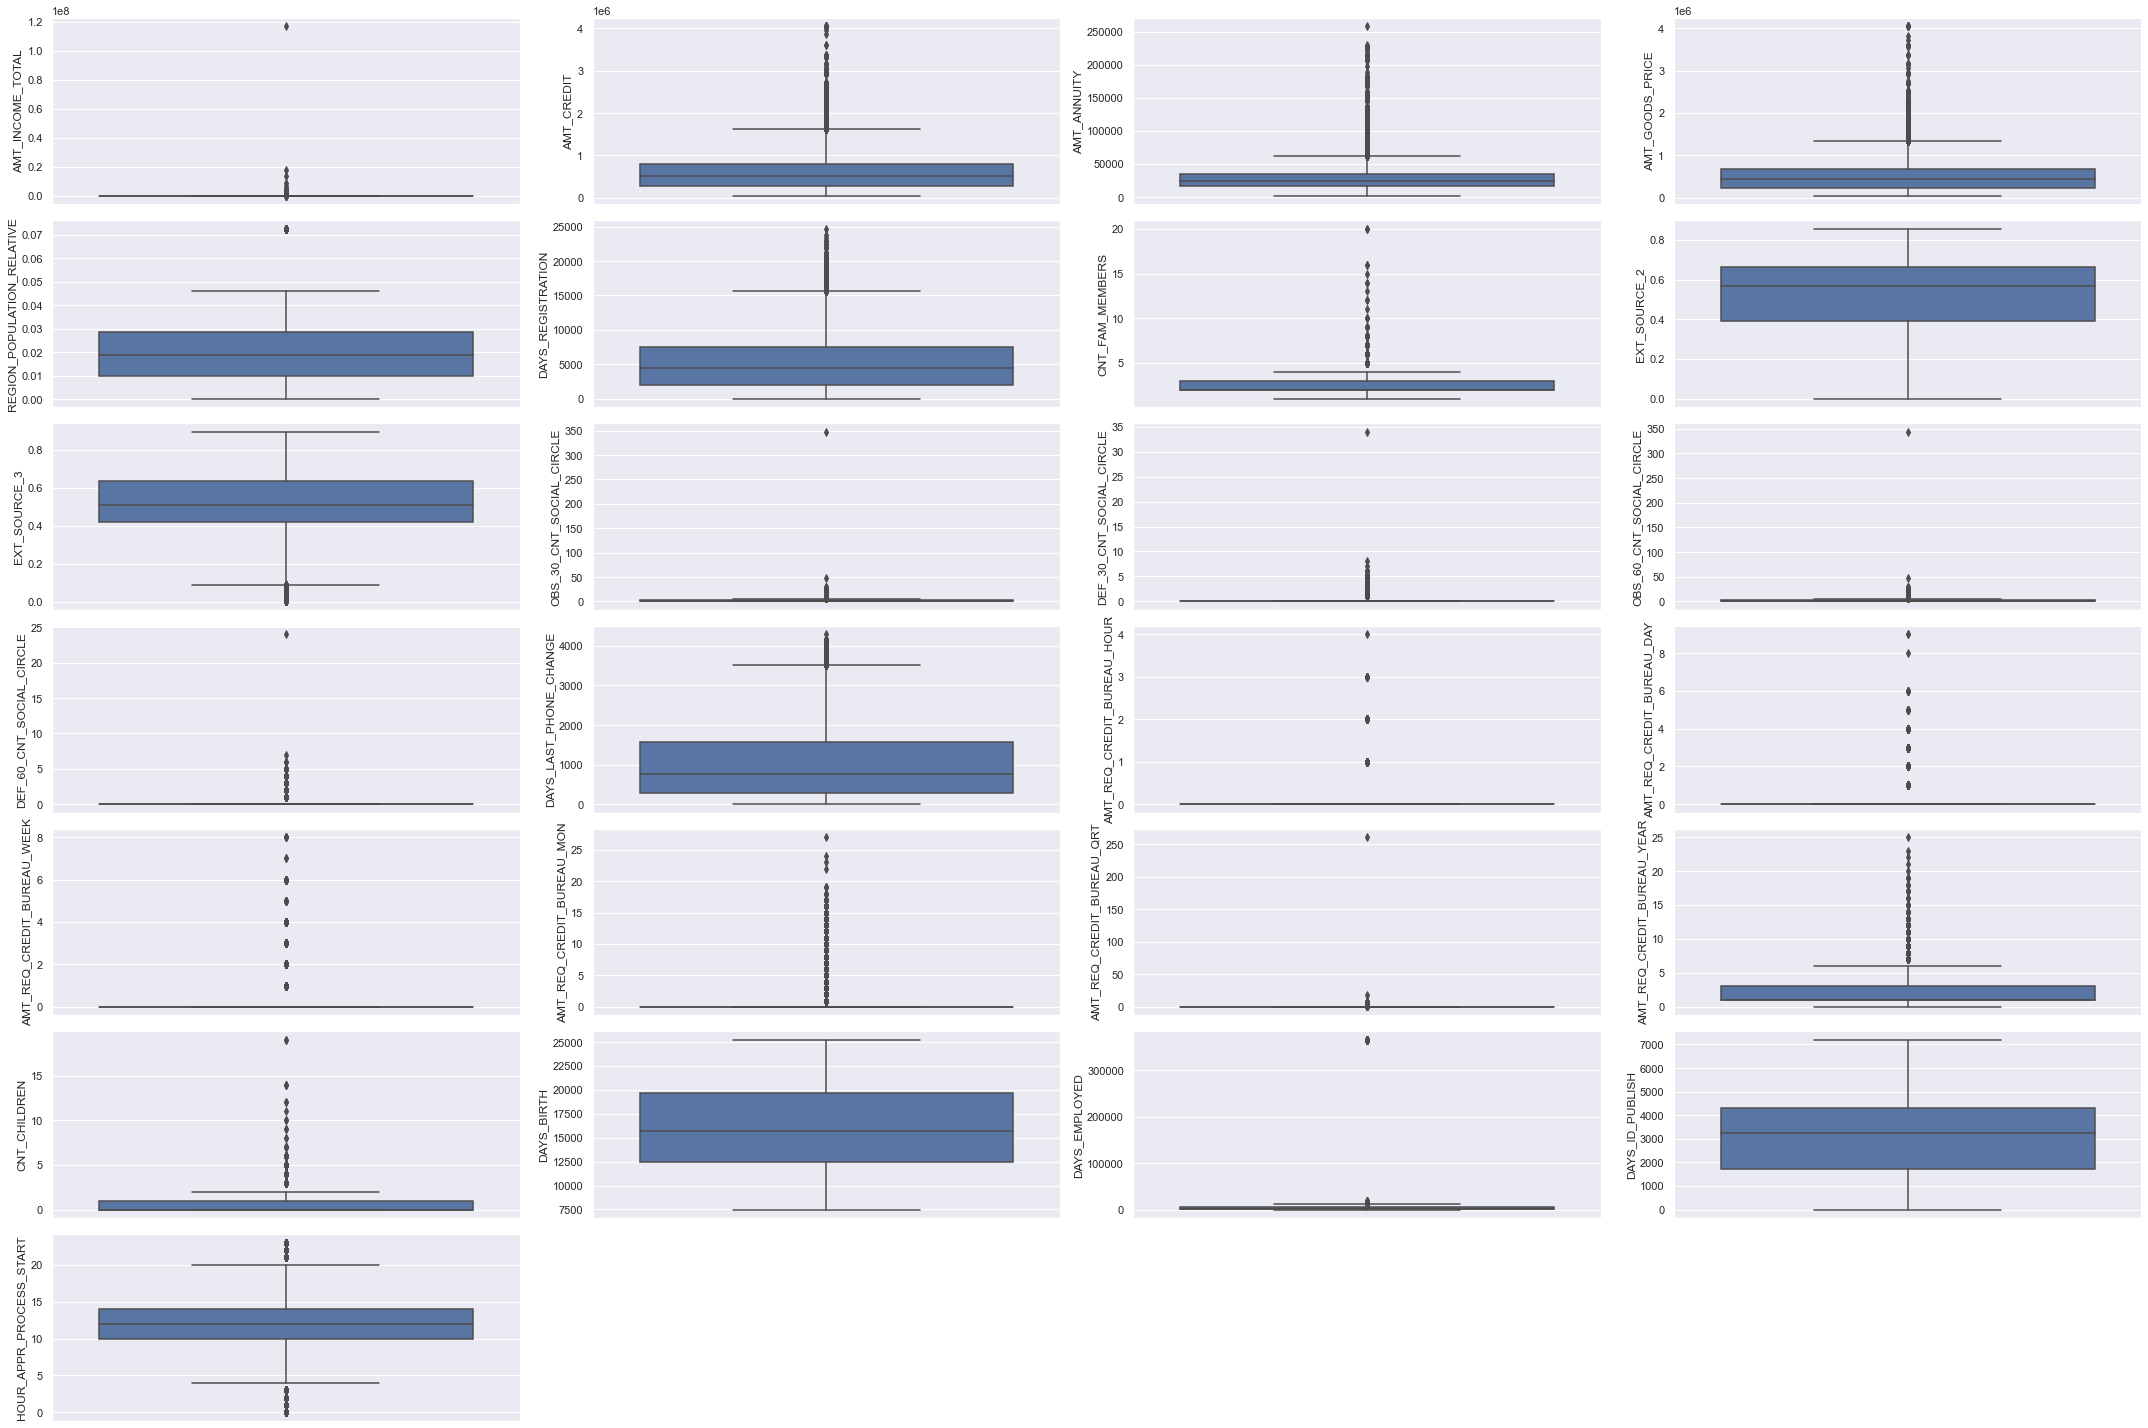

In [78]:
# outlier distribution of all features
fig, axes = plt.subplots(ncols = 4, nrows = 7, figsize = (30, 20))

sns.boxplot(y = df_imp[new_numerical[0]], ax = axes[0,0])
sns.boxplot(y = df_imp[new_numerical[1]], ax = axes[0,1])
sns.boxplot(y = df_imp[new_numerical[2]], ax = axes[0,2])
sns.boxplot(y = df_imp[new_numerical[3]], ax = axes[0,3])
sns.boxplot(y = df_imp[new_numerical[4]], ax = axes[1,0])
sns.boxplot(y = df_imp[new_numerical[5]], ax = axes[1,1])
sns.boxplot(y = df_imp[new_numerical[6]], ax = axes[1,2])
sns.boxplot(y = df_imp[new_numerical[7]], ax = axes[1,3])
sns.boxplot(y = df_imp[new_numerical[8]], ax = axes[2,0])
sns.boxplot(y = df_imp[new_numerical[9]], ax = axes[2,1])
sns.boxplot(y = df_imp[new_numerical[10]], ax = axes[2,2])
sns.boxplot(y = df_imp[new_numerical[11]], ax = axes[2,3])
sns.boxplot(y = df_imp[new_numerical[12]], ax = axes[3,0])
sns.boxplot(y = df_imp[new_numerical[13]], ax = axes[3,1])
sns.boxplot(y = df_imp[new_numerical[14]], ax = axes[3,2])
sns.boxplot(y = df_imp[new_numerical[15]], ax = axes[3,3])
sns.boxplot(y = df_imp[new_numerical[16]], ax = axes[4,0])
sns.boxplot(y = df_imp[new_numerical[17]], ax = axes[4,1])
sns.boxplot(y = df_imp[new_numerical[18]], ax = axes[4,2])
sns.boxplot(y = df_imp[new_numerical[19]], ax = axes[4,3])
sns.boxplot(y = df_imp[new_numerical[20]], ax = axes[5,0])
sns.boxplot(y = df_imp[new_numerical[21]], ax = axes[5,1])
sns.boxplot(y = df_imp[new_numerical[22]], ax = axes[5,2])
sns.boxplot(y = df_imp[new_numerical[23]], ax = axes[5,3])
sns.boxplot(y = df_imp[new_numerical[24]], ax = axes[6,0])

fig.delaxes(axes[6,1])
fig.delaxes(axes[6,2])
fig.delaxes(axes[6,3])
fig.tight_layout()

#### It can be seen that there are outliers for almost all the variables. For EXT_SOURCE_2, DAYS_BIRTH and DAYS_ID_PUBLISH, there don't seem to be any outliers. However, we shall analyze each column thoroughly.

#### The describe function gives the summary statistics, but for some variables, it gives values in terms of exponents. So we can use the inbuilt statistics functions which can give values properly. For this purpose, we create a function.

In [79]:
# function for univariate plots
def uni(df, col):
    fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 6))
    ax[0].set_title('Distribution Plot')
    sns.distplot(df[col], ax = ax[0])
    ax[1].set_title('Box Plot')
    sns.boxplot(y = df[col], ax = ax[1])
    plt.show()

# function to print statistics
def print_stats(df, var):
    print('count:', df[var].count())
    print('mean:', df[var].mean())
    print('std:', df[var].std())
    print('min:', df[var].min())
    print('25%:', df[var].quantile(0.25))
    print('50%:', df[var].median())
    print('75%:', df[var].quantile(0.75))
    print('max:', df[var].max())
    iqr = df[var].quantile(0.75) - df[var].quantile(0.25)
    print('iqr:', iqr)
    lower_limit = df[var].quantile(0.25) - (1.5 * iqr)
    upper_limit = df[var].quantile(0.75) + (1.5 * iqr)
    print('Lower Limit ', lower_limit)
    print('Upper Limit ', upper_limit)

#### Now let us analyze the outliers in each column.

### CNT_CHILDREN

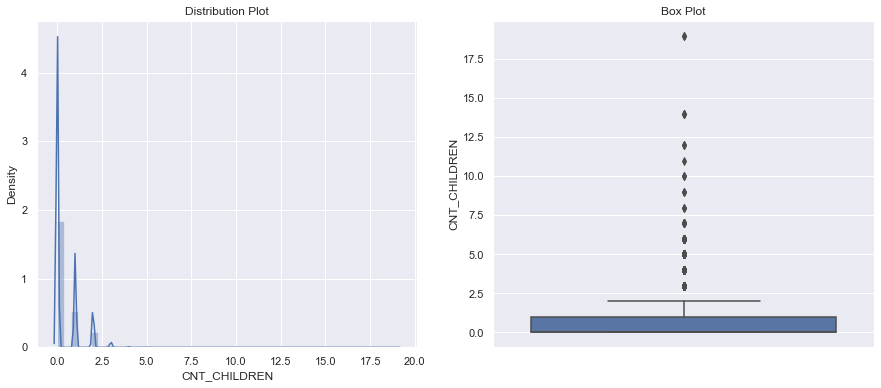

In [80]:
# distribution and boxplot of CNT_CHILDREN to check for outliers
uni(df_imp, 'CNT_CHILDREN')

In [81]:
# summary statistics of CNT_CHILDREN
print_stats(df_imp, 'CNT_CHILDREN')

count: 307511
mean: 0.4170517477423572
std: 0.7221213844389559
min: 0
25%: 0.0
50%: 0.0
75%: 1.0
max: 19
iqr: 1.0
Lower Limit  -1.5
Upper Limit  2.5


#### The outliers for CNT_CHILDREN lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

#### Just like the missing value analysis, here also we create a dataframe for storing the outlier handling techinque for each variable.

In [82]:
# dataframe for holding imputation technique for each column
outl_cols = pd.DataFrame(new_numerical).rename(columns = {0:'Column'})

# setting default values
outl_cols['Value'] = '3rd Quartile'
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
7,EXT_SOURCE_2,3rd Quartile
8,EXT_SOURCE_3,3rd Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile


### AMT_INCOME_TOTAL

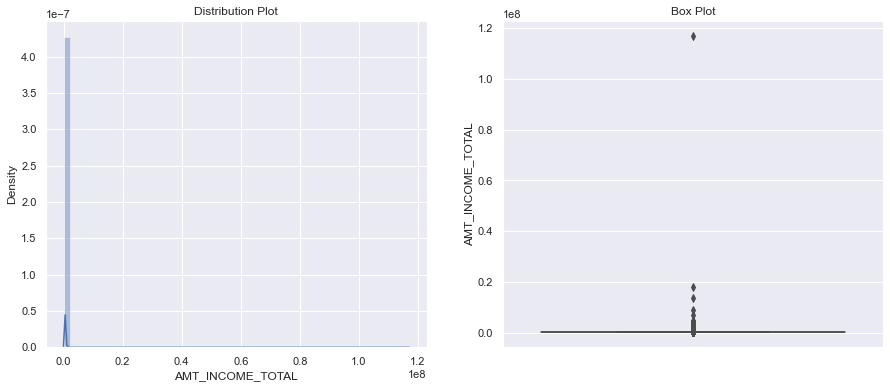

In [83]:
# distribution and boxplot of AMT_INCOME_TOTAL to check for outliers
uni(df_imp, 'AMT_INCOME_TOTAL')

In [84]:
# summary statistics of AMT_INCOME_TOTAL
print_stats(df_imp, 'AMT_INCOME_TOTAL')

count: 307511
mean: 168797.9192969845
std: 237123.14627883647
min: 25650.0
25%: 112500.0
50%: 147150.0
75%: 202500.0
max: 117000000.0
iqr: 90000.0
Lower Limit  -22500.0
Upper Limit  337500.0


#### The outliers for AMT_INCOME_TOTAL lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_CREDIT

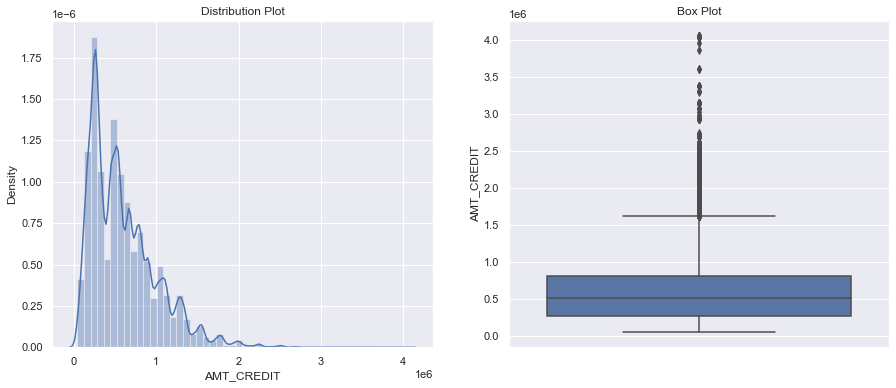

In [85]:
# distribution and boxplot of AMT_CREDIT to check for outliers
uni(df_imp, 'AMT_CREDIT')

In [86]:
# summary statistics of AMT_CREDIT
print_stats(df_imp, 'AMT_CREDIT')

count: 307511
mean: 599025.9997057016
std: 402490.776995946
min: 45000.0
25%: 270000.0
50%: 513531.0
75%: 808650.0
max: 4050000.0
iqr: 538650.0
Lower Limit  -537975.0
Upper Limit  1616625.0


#### The outliers for AMT_CREDIT lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_ANNUITY

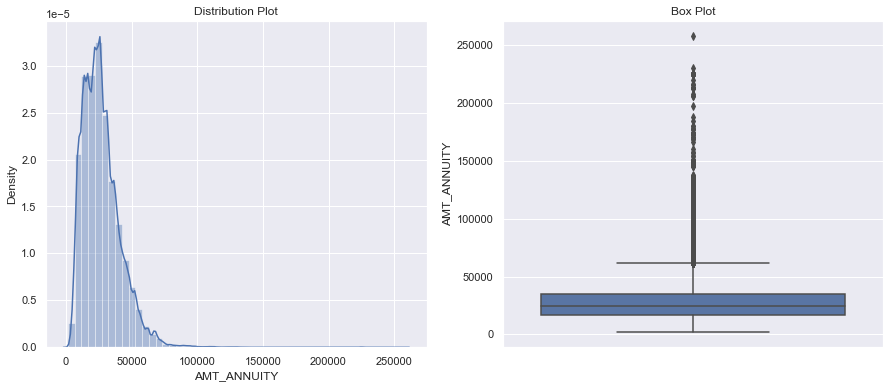

In [87]:
# distribution and boxplot of AMT_ANNUITY to check for outliers
uni(df_imp, 'AMT_ANNUITY')

In [88]:
# summary statistics of AMT_ANNUITY
print_stats(df_imp, 'AMT_ANNUITY')

count: 307511
mean: 27108.48784108536
std: 14493.461065491048
min: 1615.5
25%: 16524.0
50%: 24903.0
75%: 34596.0
max: 258025.5
iqr: 18072.0
Lower Limit  -10584.0
Upper Limit  61704.0


#### The outliers for AMT_ANNUITY lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_GOODS_PRICE

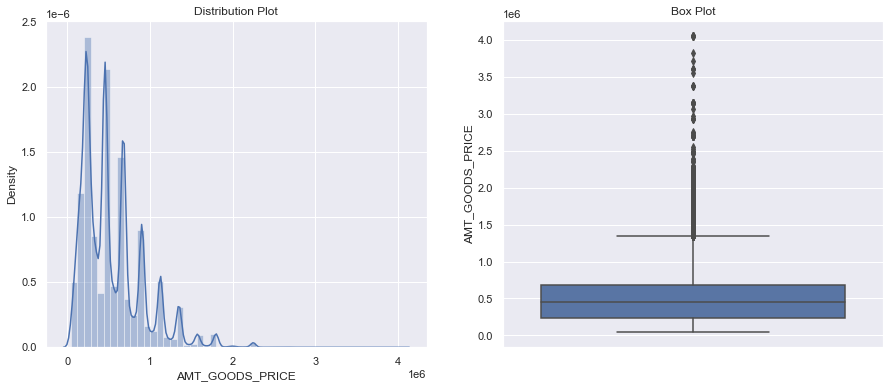

In [89]:
# distribution and boxplot of AMT_GOODS_PRICE to check for outliers
uni(df_imp, 'AMT_GOODS_PRICE')

In [90]:
# summary statistics of AMT_GOODS_PRICE
print_stats(df_imp, 'AMT_GOODS_PRICE')

count: 307511
mean: 538316.2943667056
std: 369288.98224565014
min: 40500.0
25%: 238500.0
50%: 450000.0
75%: 679500.0
max: 4050000.0
iqr: 441000.0
Lower Limit  -423000.0
Upper Limit  1341000.0


#### The outliers for AMT_GOODS_PRICE lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### REGION_POPULATION_RELATIVE

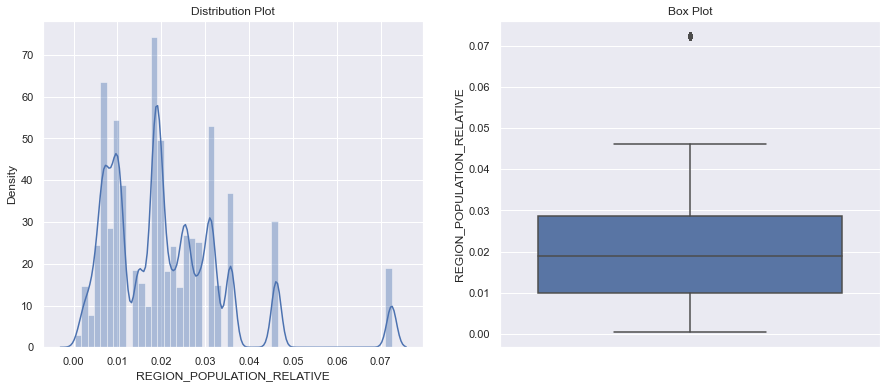

In [91]:
# distribution and boxplot of REGION_POPULATION_RELATIVE to check for outliers
uni(df_imp, 'REGION_POPULATION_RELATIVE')

In [92]:
# summary statistics of REGION_POPULATION_RELATIVE
print_stats(df_imp, 'REGION_POPULATION_RELATIVE')

count: 307511
mean: 0.02086811205778947
std: 0.013831280122699869
min: 0.00029
25%: 0.010006
50%: 0.01885
75%: 0.028663
max: 0.072508
iqr: 0.018657
Lower Limit  -0.017979500000000002
Upper Limit  0.056648500000000004


#### There are a few outliers for REGION_POPULATION_RELATIVE which lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### DAYS_REGISTRATION

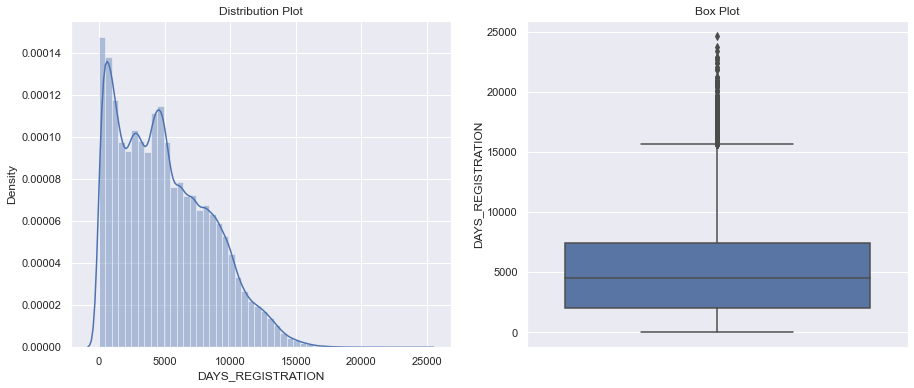

In [93]:
# distribution and boxplot of DAYS_REGISTRATION to check for outliers
uni(df_imp, 'DAYS_REGISTRATION')

In [94]:
# summary statistics of DAYS_REGISTRATION
print_stats(df_imp, 'DAYS_REGISTRATION')

count: 307511
mean: 4986.120327538419
std: 3522.88632096305
min: 0.0
25%: 2010.0
50%: 4504.0
75%: 7479.5
max: 24672.0
iqr: 5469.5
Lower Limit  -6194.25
Upper Limit  15683.75


#### There are a few outliers for DAYS_REGISTRATION which lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### CNT_FAM_MEMBERS

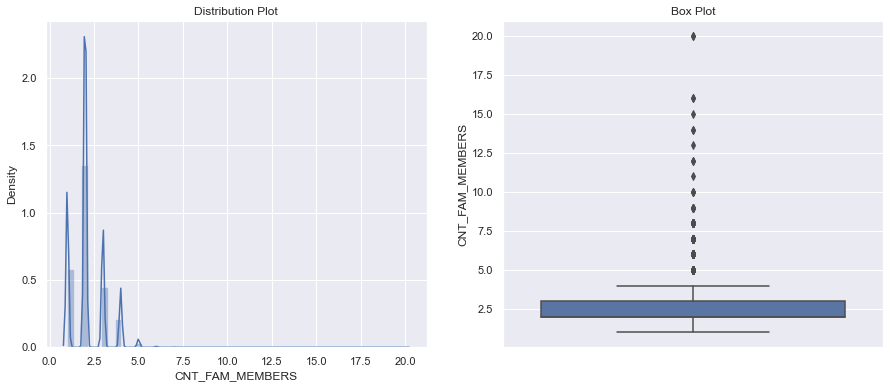

In [95]:
# distribution and boxplot of CNT_FAM_MEMBERS to check for outliers
uni(df_imp, 'CNT_FAM_MEMBERS')

In [96]:
# summary statistics of CNT_FAM_MEMBERS
print_stats(df_imp, 'CNT_FAM_MEMBERS')

count: 307511
mean: 2.1526644575316003
std: 0.9106786909306551
min: 1.0
25%: 2.0
50%: 2.0
75%: 3.0
max: 20.0
iqr: 1.0
Lower Limit  0.5
Upper Limit  4.5


#### The outliers for CNT_FAM_MEMBERS lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### EXT_SOURCE_2

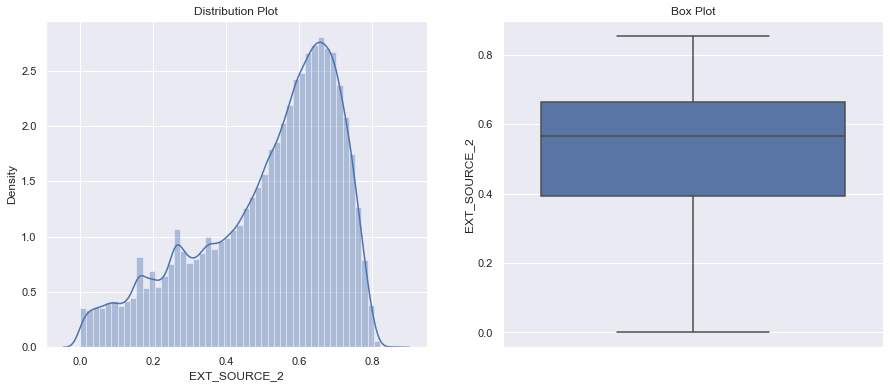

In [97]:
# distribution and boxplot of EXT_SOURCE_2 to check for outliers
uni(df_imp, 'EXT_SOURCE_2')

#### Since there are no outliers in EXT_SOURCE_2, there is no need to process this variable.

In [98]:
# dropping EXT_SOURCE_2 variable from the list
outl_cols.drop(outl_cols[outl_cols['Column'] == 'EXT_SOURCE_2'].index, inplace = True)
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
8,EXT_SOURCE_3,3rd Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile
10,DEF_30_CNT_SOCIAL_CIRCLE,3rd Quartile


### EXT_SOURCE_3

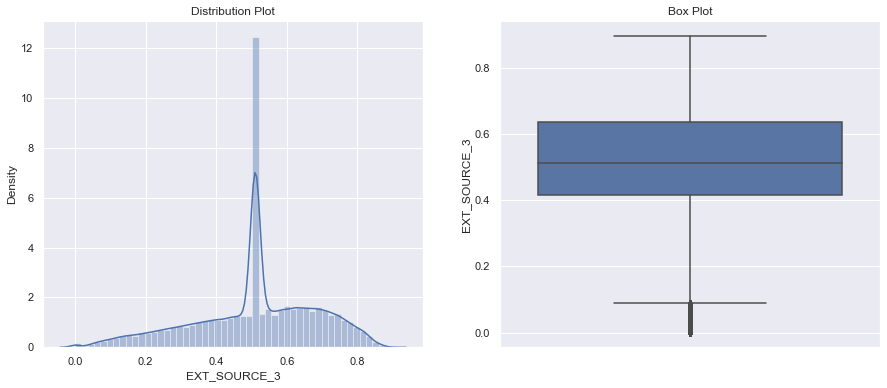

In [99]:
# distribution and boxplot of EXT_SOURCE_3 to check for outliers
uni(df_imp, 'EXT_SOURCE_3')

In [100]:
# summary statistics of EXT_SOURCE_3
print_stats(df_imp, 'EXT_SOURCE_3')

count: 307511
mean: 0.5108529061805426
std: 0.17446420151968142
min: 0.0005272652387098
25%: 0.4170996682522097
50%: 0.5108529061800121
75%: 0.6363761710860439
max: 0.8960095494948396
iqr: 0.21927650283383426
Lower Limit  0.08818491400145828
Upper Limit  0.9652909253367954


#### The outliers for EXT_SOURCE_3 lie below the lower whisker. So we can replace the outliers with the 1st quartile value.

In [101]:
# setting values for this variable
outl_cols.loc[outl_cols['Column'] == 'EXT_SOURCE_3', 'Value'] = '1st Quartile'
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
8,EXT_SOURCE_3,1st Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile
10,DEF_30_CNT_SOCIAL_CIRCLE,3rd Quartile


### OBS_30_CNT_SOCIAL_CIRCLE

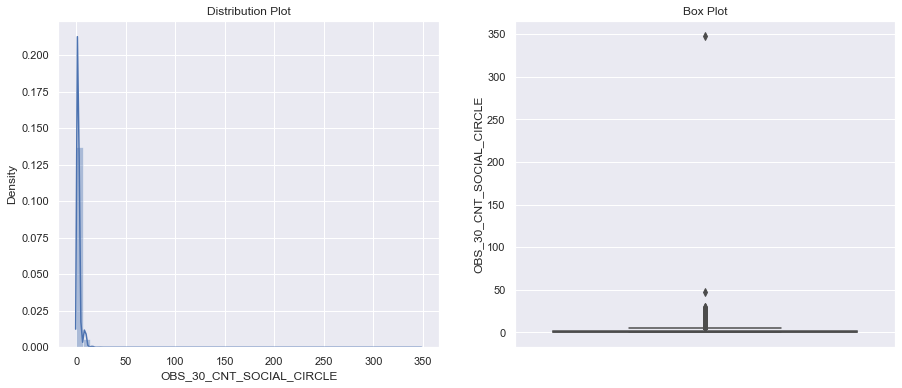

In [102]:
# distribution and boxplot of OBS_30_CNT_SOCIAL_CIRCLE to check for outliers
uni(df_imp, 'OBS_30_CNT_SOCIAL_CIRCLE')

In [103]:
# summary statistics of OBS_30_CNT_SOCIAL_CIRCLE
print_stats(df_imp, 'OBS_30_CNT_SOCIAL_CIRCLE')

count: 307511
mean: 1.4175232755901415
std: 2.398395406064588
min: 0.0
25%: 0.0
50%: 0.0
75%: 2.0
max: 348.0
iqr: 2.0
Lower Limit  -3.0
Upper Limit  5.0


#### The outliers for OBS_30_CNT_SOCIAL_CIRCLE lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### DEF_30_CNT_SOCIAL_CIRCLE

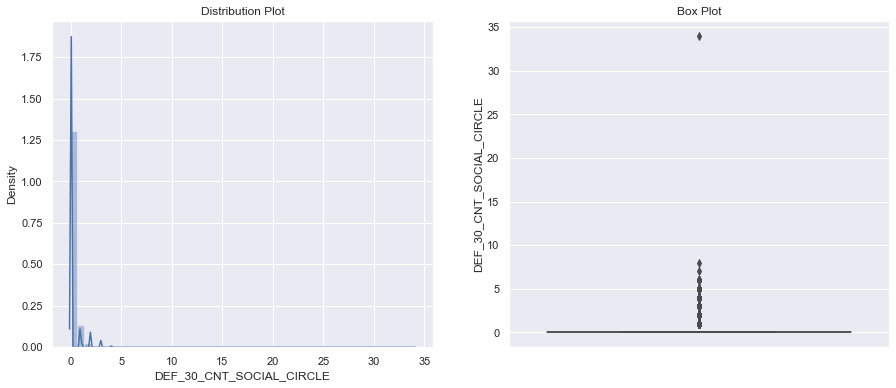

In [104]:
# distribution and boxplot of DEF_30_CNT_SOCIAL_CIRCLE to check for outliers
uni(df_imp, 'DEF_30_CNT_SOCIAL_CIRCLE')

In [105]:
# summary statistics of DEF_30_CNT_SOCIAL_CIRCLE
print_stats(df_imp, 'DEF_30_CNT_SOCIAL_CIRCLE')

count: 307511
mean: 0.14294448003486054
std: 0.4460325557437661
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 34.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for DEF_30_CNT_SOCIAL_CIRCLE lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### OBS_60_CNT_SOCIAL_CIRCLE

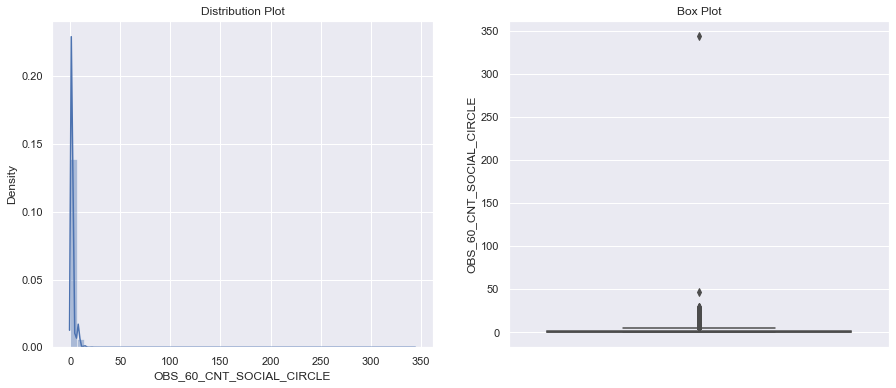

In [106]:
# distribution and boxplot of OBS_60_CNT_SOCIAL_CIRCLE to check for outliers
uni(df_imp, 'OBS_60_CNT_SOCIAL_CIRCLE')

In [107]:
# summary statistics of OBS_60_CNT_SOCIAL_CIRCLE
print_stats(df_imp, 'OBS_60_CNT_SOCIAL_CIRCLE')

count: 307511
mean: 1.4006263190585053
std: 2.377224266057835
min: 0.0
25%: 0.0
50%: 0.0
75%: 2.0
max: 344.0
iqr: 2.0
Lower Limit  -3.0
Upper Limit  5.0


#### The outliers for OBS_60_CNT_SOCIAL_CIRCLE lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### DEF_60_CNT_SOCIAL_CIRCLE

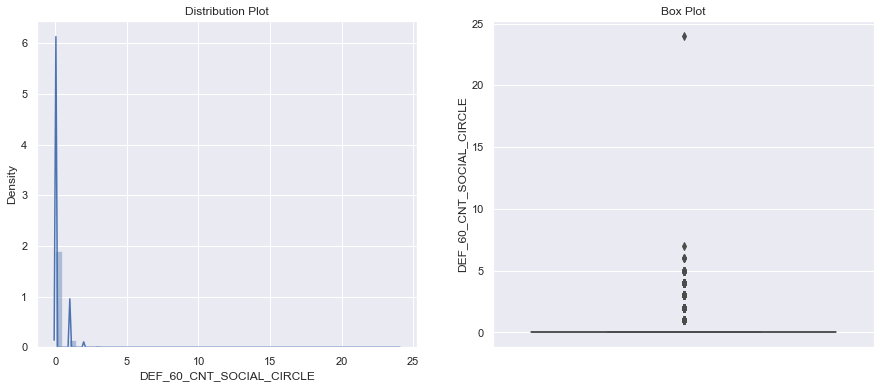

In [108]:
# distribution and boxplot of DEF_60_CNT_SOCIAL_CIRCLE to check for outliers
uni(df_imp, 'DEF_60_CNT_SOCIAL_CIRCLE')

In [109]:
# summary statistics of DEF_60_CNT_SOCIAL_CIRCLE
print_stats(df_imp, 'DEF_60_CNT_SOCIAL_CIRCLE')

count: 307511
mean: 0.09971675809971026
std: 0.36173465013249073
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 24.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for DEF_60_CNT_SOCIAL_CIRCLE lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_HOUR

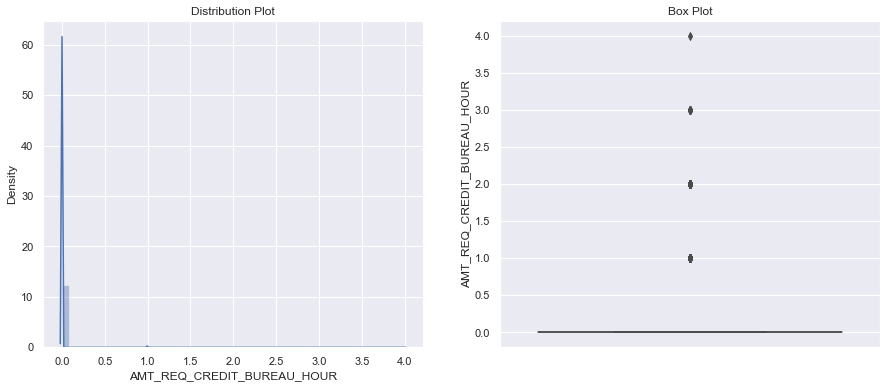

In [110]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_HOUR to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_HOUR')

In [111]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_HOUR
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_HOUR')

count: 307511
mean: 0.005538013274321894
std: 0.07801413049736325
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 4.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_HOUR lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_DAY

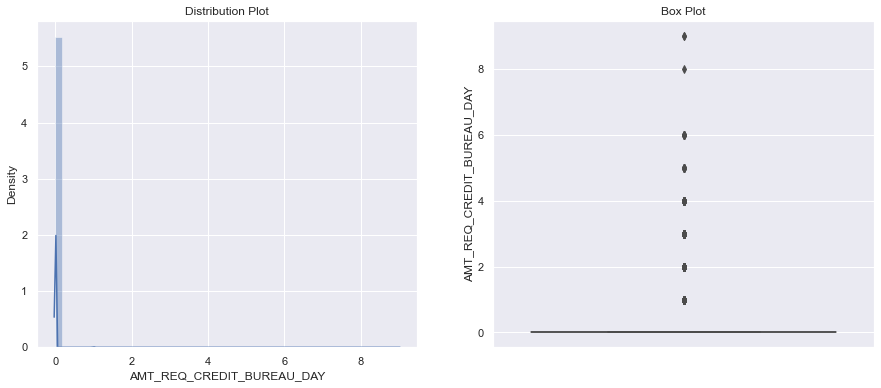

In [112]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_DAY to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_DAY')

In [113]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_DAY
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_DAY')

count: 307511
mean: 0.0060550679487888235
std: 0.10303712010865379
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 9.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_DAY lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_WEEK

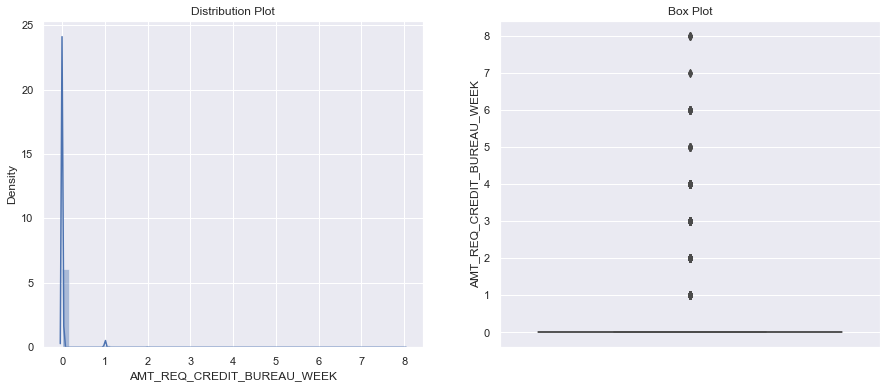

In [114]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_WEEK to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_WEEK')

In [115]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_WEEK
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_WEEK')

count: 307511
mean: 0.029722513991369416
std: 0.19072793759936296
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 8.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_WEEK lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_MON

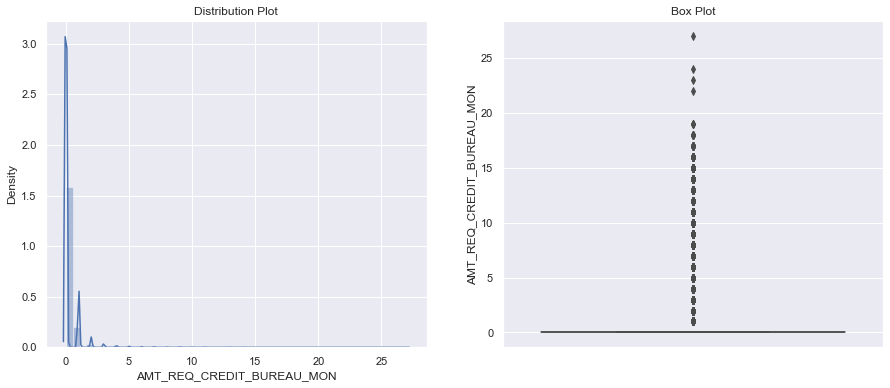

In [116]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_MON to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_MON')

In [117]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_MON
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_MON')

count: 307511
mean: 0.23129253912868158
std: 0.8568100735744607
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 27.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_MON lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_QRT

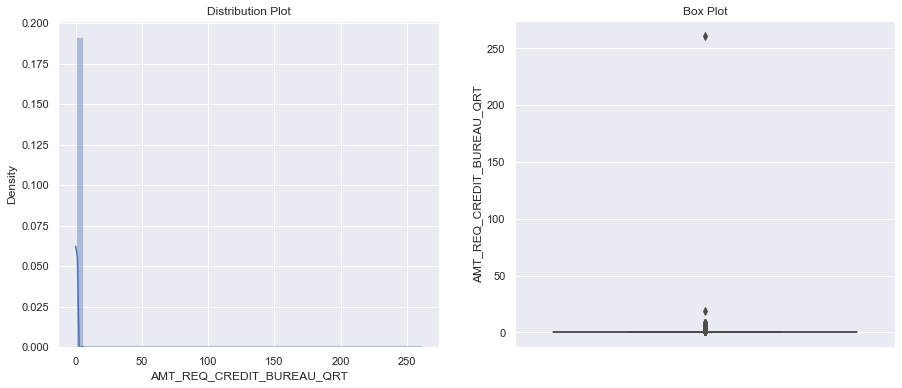

In [118]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_QRT to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_QRT')

In [119]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_QRT
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_QRT')

count: 307511
mean: 0.22963080995476584
std: 0.74405899265144
min: 0.0
25%: 0.0
50%: 0.0
75%: 0.0
max: 261.0
iqr: 0.0
Lower Limit  0.0
Upper Limit  0.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_QRT lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### AMT_REQ_CREDIT_BUREAU_YEAR

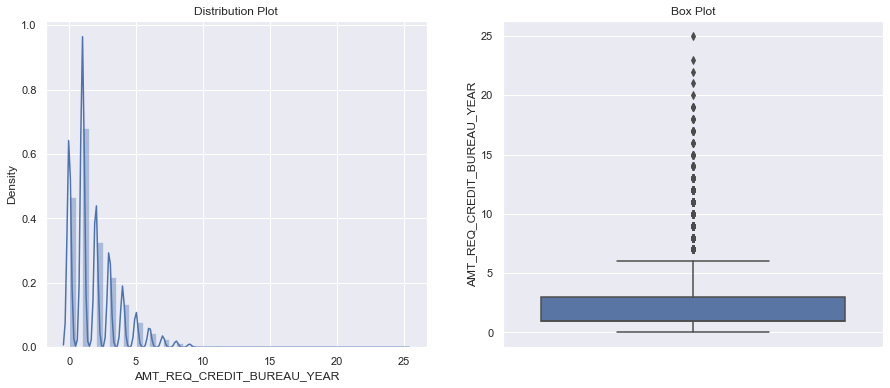

In [120]:
# distribution and boxplot of AMT_REQ_CREDIT_BUREAU_YEAR to check for outliers
uni(df_imp, 'AMT_REQ_CREDIT_BUREAU_YEAR')

In [121]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_YEAR
print_stats(df_imp, 'AMT_REQ_CREDIT_BUREAU_YEAR')

count: 307511
mean: 1.778463209446166
std: 1.7655231477173585
min: 0.0
25%: 1.0
50%: 1.0
75%: 3.0
max: 25.0
iqr: 2.0
Lower Limit  -2.0
Upper Limit  6.0


#### The outliers for AMT_REQ_CREDIT_BUREAU_YEAR lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### CNT_CHILDREN

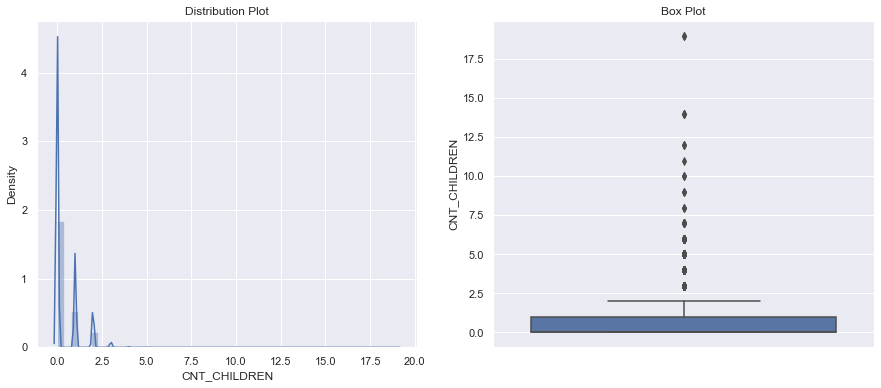

In [122]:
# distribution and boxplot of CNT_CHILDREN to check for outliers
uni(df_imp, 'CNT_CHILDREN')

In [123]:
# summary statistics of CNT_CHILDREN
print_stats(df_imp, 'CNT_CHILDREN')

count: 307511
mean: 0.4170517477423572
std: 0.7221213844389559
min: 0
25%: 0.0
50%: 0.0
75%: 1.0
max: 19
iqr: 1.0
Lower Limit  -1.5
Upper Limit  2.5


#### The outliers for CNT_CHILDREN lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### DAYS_BIRTH

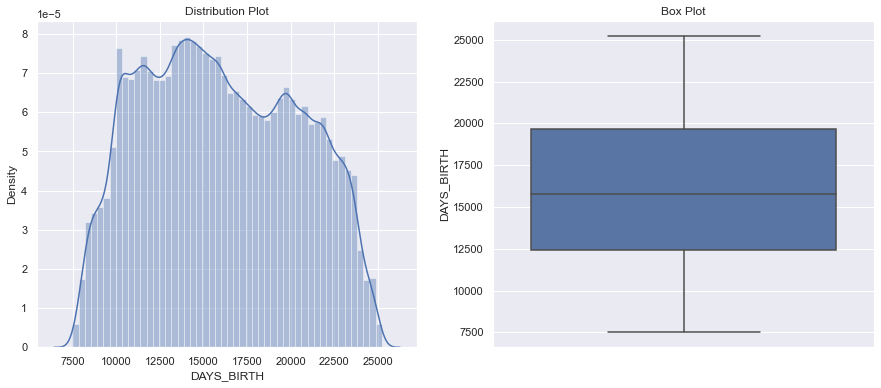

In [124]:
# distribution and boxplot of DAYS_BIRTH to check for outliers
uni(df_imp, 'DAYS_BIRTH')

#### Since there are no outliers in DAYS_BIRTH, there is no need to process this variable.

In [125]:
# dropping DAYS_BIRTH variable from the list
outl_cols.drop(outl_cols[outl_cols['Column'] == 'DAYS_BIRTH'].index, inplace = True)
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
8,EXT_SOURCE_3,1st Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile
10,DEF_30_CNT_SOCIAL_CIRCLE,3rd Quartile


### DAYS_EMPLOYED

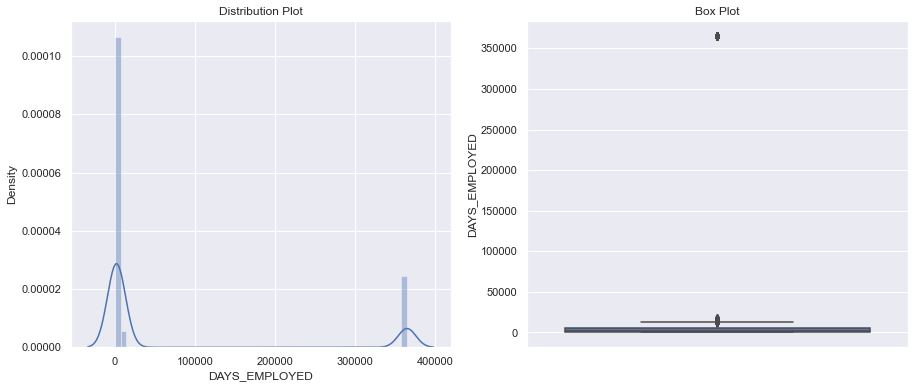

In [126]:
# distribution and boxplot of DAYS_EMPLOYED to check for outliers
uni(df_imp, 'DAYS_EMPLOYED')

In [127]:
# summary statistics of DAYS_EMPLOYED
print_stats(df_imp, 'DAYS_EMPLOYED')

count: 307511
mean: 67724.74214906133
std: 139443.7518056562
min: 0
25%: 933.0
50%: 2219.0
75%: 5707.0
max: 365243
iqr: 4774.0
Lower Limit  -6228.0
Upper Limit  12868.0


#### The outliers for DAYS_EMPLOYED lie above the upper whisker. So we can replace the outliers with the 3rd quartile value.

### DAYS_ID_PUBLISH

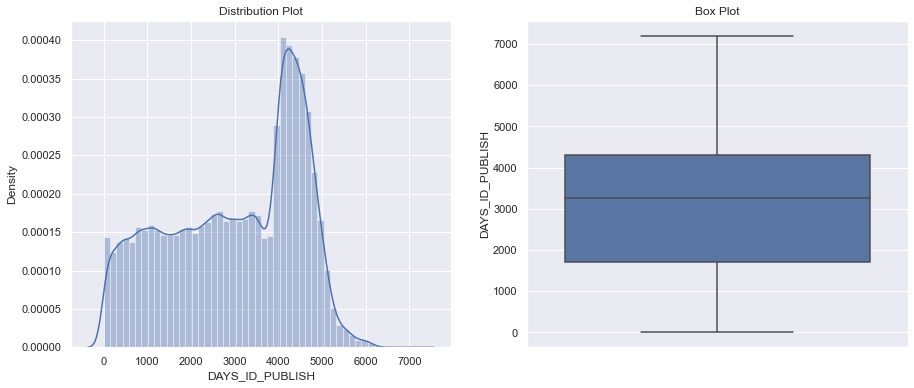

In [128]:
# distribution and boxplot of DAYS_ID_PUBLISH to check for outliers
uni(df_imp, 'DAYS_ID_PUBLISH')

#### Since there are no outliers in DAYS_ID_PUBLISH, there is no need to process this variable.

In [129]:
# dropping DAYS_BIRTH variable from the list
outl_cols.drop(outl_cols[outl_cols['Column'] == 'DAYS_ID_PUBLISH'].index, inplace = True)
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
8,EXT_SOURCE_3,1st Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile
10,DEF_30_CNT_SOCIAL_CIRCLE,3rd Quartile


### HOUR_APPR_PROCESS_START

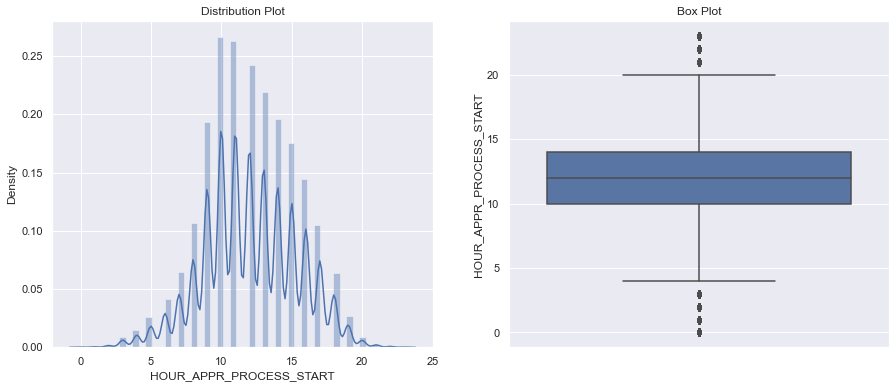

In [130]:
# distribution and boxplot of HOUR_APPR_PROCESS_START to check for outliers
uni(df_imp, 'HOUR_APPR_PROCESS_START')

In [131]:
# summary statistics of AMT_REQ_CREDIT_BUREAU_HOUR
print_stats(df_imp, 'HOUR_APPR_PROCESS_START')

count: 307511
mean: 12.063418869568894
std: 3.265832255439005
min: 0
25%: 10.0
50%: 12.0
75%: 14.0
max: 23
iqr: 4.0
Lower Limit  4.0
Upper Limit  20.0


#### The outliers for HOUR_APPR_PROCESS_START lie both above the upper whisker and below the lower whisker. So we can replace the outliers with the 1st and 3rd quartile value.

In [132]:
# setting values for this variable
outl_cols.loc[outl_cols['Column'] == 'HOUR_APPR_PROCESS_START', 'Value'] = '1st & 3rd Quartile'
outl_cols

,Column,Value
0,AMT_INCOME_TOTAL,3rd Quartile
1,AMT_CREDIT,3rd Quartile
2,AMT_ANNUITY,3rd Quartile
3,AMT_GOODS_PRICE,3rd Quartile
4,REGION_POPULATION_RELATIVE,3rd Quartile
5,DAYS_REGISTRATION,3rd Quartile
6,CNT_FAM_MEMBERS,3rd Quartile
8,EXT_SOURCE_3,1st Quartile
9,OBS_30_CNT_SOCIAL_CIRCLE,3rd Quartile
10,DEF_30_CNT_SOCIAL_CIRCLE,3rd Quartile


#### Now that we have decided on the criteria for handling the outliers for all columns, let us proceed in handling the outliers.

[Back to Contents](#contents)

<a id='winsorizer'></a>

## Outlier Handling

#### Now that we have analyzed the outliers of all the variables, let us replace these outliers with their specific values. For this purpose, we use the Winsorizer from feature-engine library.

In [133]:
# outlier removal pipeline
outl_pipe = Pipeline([
    # lower whisker replacement
    ('low_wins', outr.Winsorizer(capping_method = 'iqr', tail = 'left', fold = 1.5, 
                                 variables = outl_cols.loc[outl_cols['Value'] == '1st Quartile', 'Column'].to_list())),
    
    # upper whisker replacement
    ('upp_wins', outr.Winsorizer(capping_method = 'iqr', tail = 'right', fold = 1.5, 
                                 variables = outl_cols.loc[outl_cols['Value'] == '3rd Quartile', 'Column'].to_list())),
    
    # lower and upper whisker replacement
    ('both_wins', outr.Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, 
                                 variables = outl_cols.loc[outl_cols['Value'] == '1st & 3rd Quartile', 'Column'].to_list()))    
])

# transforming the data with the winsorizer pipeline
df_outl = df_imp.copy()
df_outl = outl_pipe.fit_transform(df_outl)

#### Let us see what are the values which our winsorizers used to replace the outliers.

In [134]:
# lower whisker replacement
outl_pipe.named_steps.low_wins.left_tail_caps_

{'EXT_SOURCE_3': 0.08818491400145828}

In [135]:
# upper whisker replacement
outl_pipe.named_steps.upp_wins.right_tail_caps_

{'AMT_INCOME_TOTAL': 337500.0,
 'AMT_CREDIT': 1616625.0,
 'AMT_ANNUITY': 61704.0,
 'AMT_GOODS_PRICE': 1341000.0,
 'REGION_POPULATION_RELATIVE': 0.056648500000000004,
 'DAYS_REGISTRATION': 15683.75,
 'CNT_FAM_MEMBERS': 4.5,
 'OBS_30_CNT_SOCIAL_CIRCLE': 5.0,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0.0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 5.0,
 'DEF_60_CNT_SOCIAL_CIRCLE': 0.0,
 'DAYS_LAST_PHONE_CHANGE': 3514.0,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 0.0,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0.0,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 0.0,
 'AMT_REQ_CREDIT_BUREAU_MON': 0.0,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0.0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 6.0,
 'CNT_CHILDREN': 2.5,
 'DAYS_EMPLOYED': 12868.0}

In [136]:
# lower and upper whisker replacement
print(outl_pipe.named_steps.both_wins.left_tail_caps_)
print(outl_pipe.named_steps.both_wins.right_tail_caps_)

{'HOUR_APPR_PROCESS_START': 4.0}
{'HOUR_APPR_PROCESS_START': 20.0}


#### Let us now check the outlier distribution in the variables.

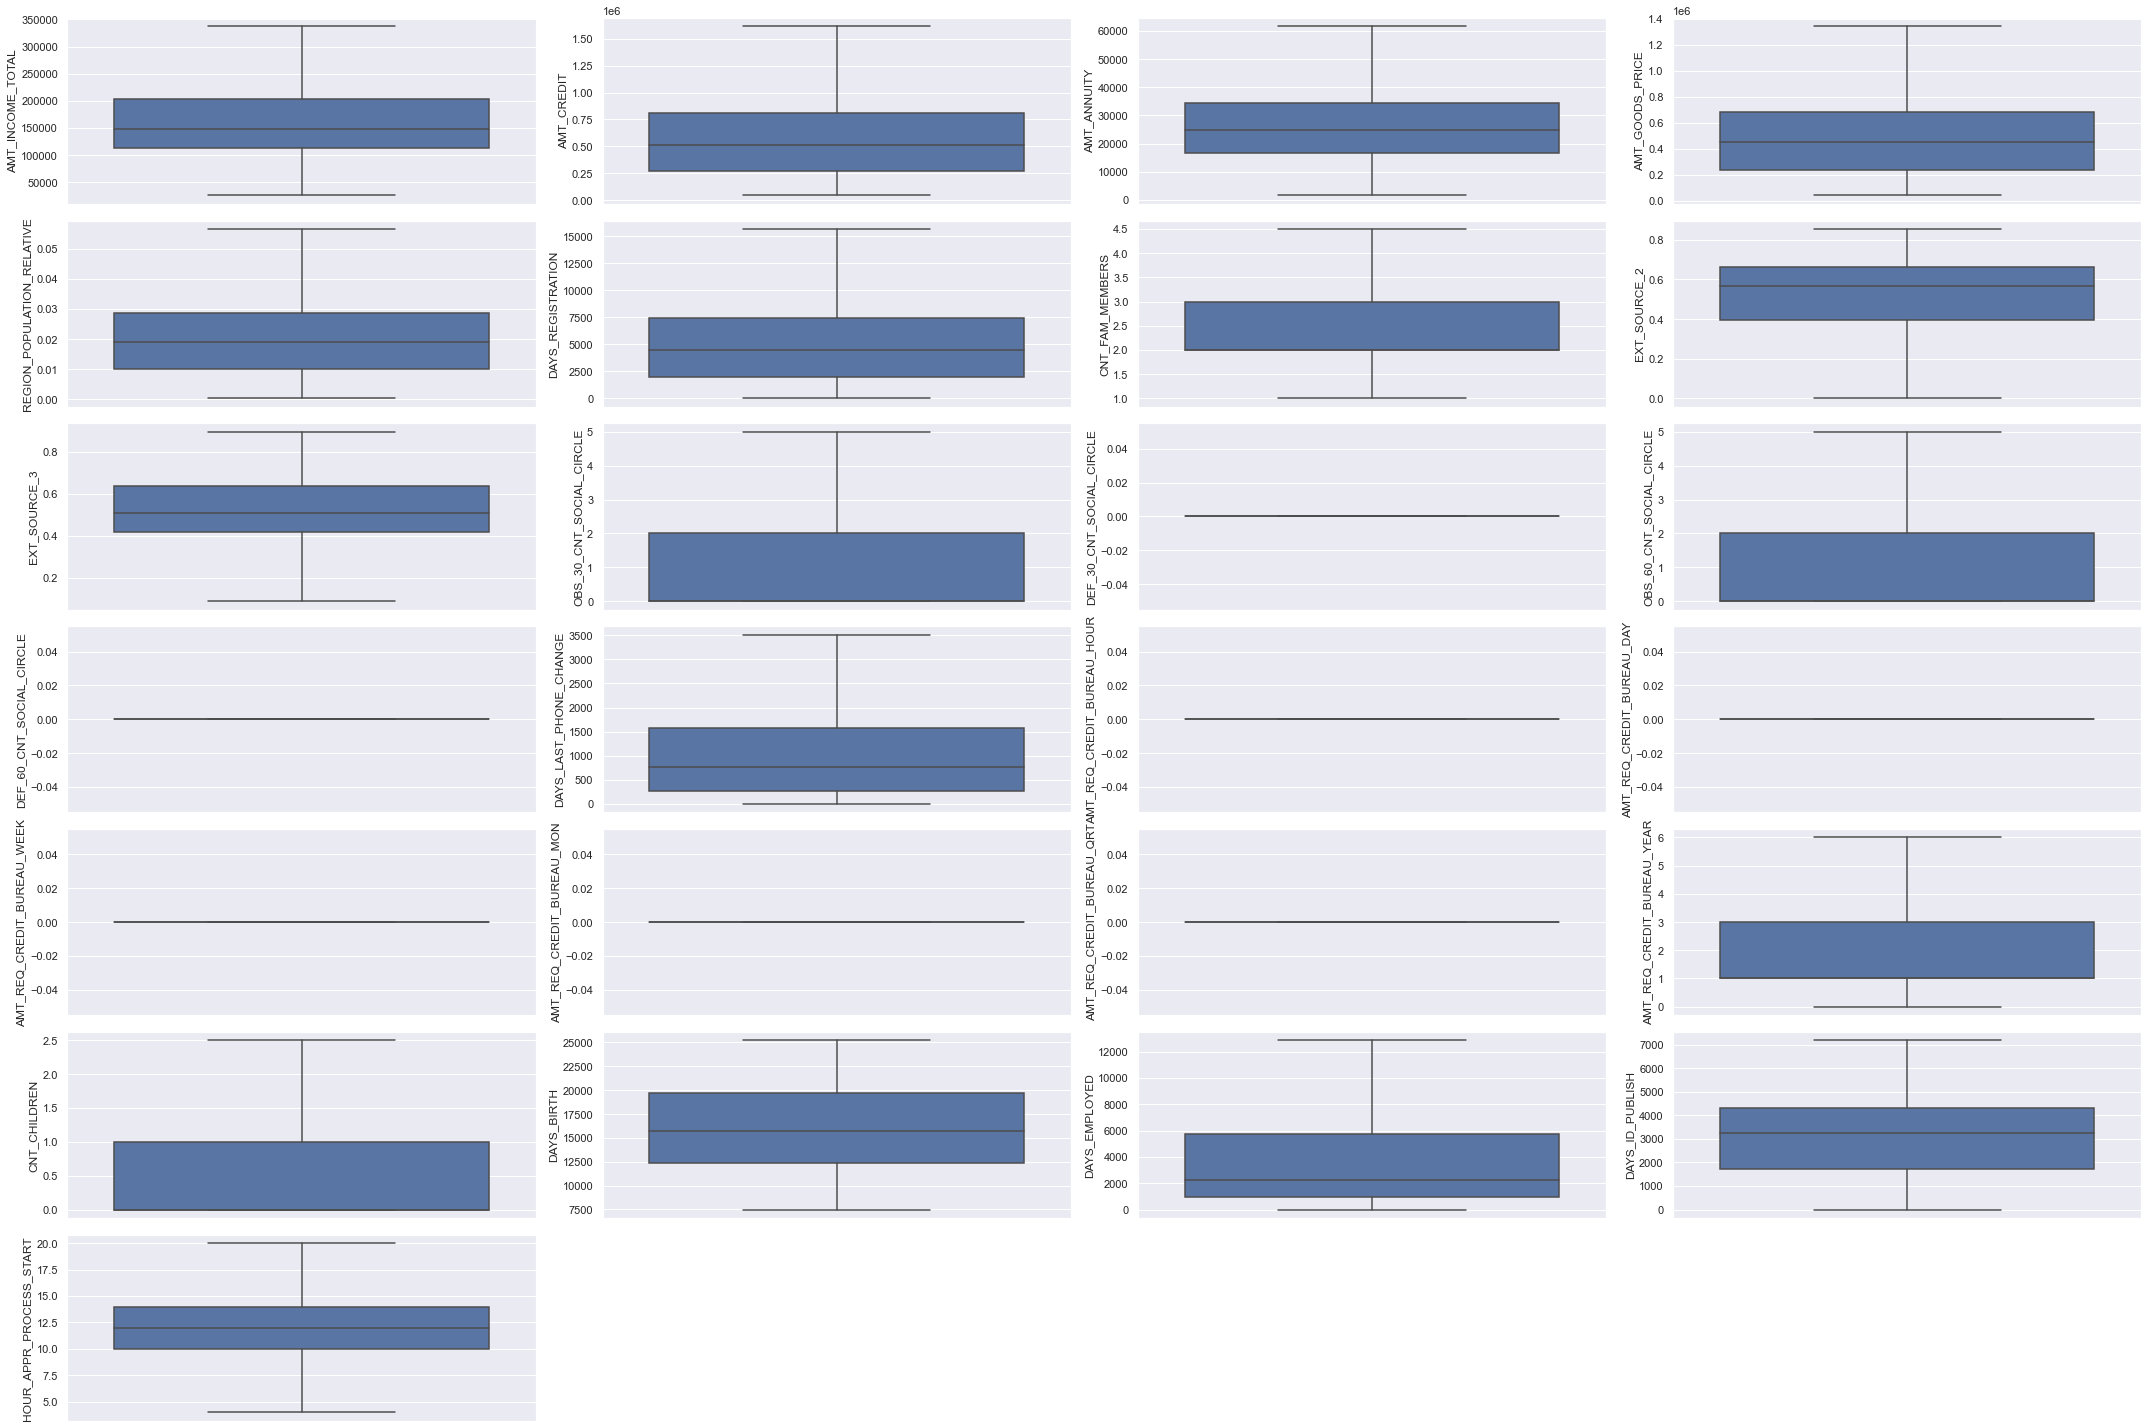

In [137]:
# outlier distribution of all features
fig, axes = plt.subplots(ncols = 4, nrows = 7, figsize = (30, 20))

sns.boxplot(y = df_outl[new_numerical[0]], ax = axes[0,0])
sns.boxplot(y = df_outl[new_numerical[1]], ax = axes[0,1])
sns.boxplot(y = df_outl[new_numerical[2]], ax = axes[0,2])
sns.boxplot(y = df_outl[new_numerical[3]], ax = axes[0,3])
sns.boxplot(y = df_outl[new_numerical[4]], ax = axes[1,0])
sns.boxplot(y = df_outl[new_numerical[5]], ax = axes[1,1])
sns.boxplot(y = df_outl[new_numerical[6]], ax = axes[1,2])
sns.boxplot(y = df_outl[new_numerical[7]], ax = axes[1,3])
sns.boxplot(y = df_outl[new_numerical[8]], ax = axes[2,0])
sns.boxplot(y = df_outl[new_numerical[9]], ax = axes[2,1])
sns.boxplot(y = df_outl[new_numerical[10]], ax = axes[2,2])
sns.boxplot(y = df_outl[new_numerical[11]], ax = axes[2,3])
sns.boxplot(y = df_outl[new_numerical[12]], ax = axes[3,0])
sns.boxplot(y = df_outl[new_numerical[13]], ax = axes[3,1])
sns.boxplot(y = df_outl[new_numerical[14]], ax = axes[3,2])
sns.boxplot(y = df_outl[new_numerical[15]], ax = axes[3,3])
sns.boxplot(y = df_outl[new_numerical[16]], ax = axes[4,0])
sns.boxplot(y = df_outl[new_numerical[17]], ax = axes[4,1])
sns.boxplot(y = df_outl[new_numerical[18]], ax = axes[4,2])
sns.boxplot(y = df_outl[new_numerical[19]], ax = axes[4,3])
sns.boxplot(y = df_outl[new_numerical[20]], ax = axes[5,0])
sns.boxplot(y = df_outl[new_numerical[21]], ax = axes[5,1])
sns.boxplot(y = df_outl[new_numerical[22]], ax = axes[5,2])
sns.boxplot(y = df_outl[new_numerical[23]], ax = axes[5,3])
sns.boxplot(y = df_outl[new_numerical[24]], ax = axes[6,0])

fig.delaxes(axes[6,1])
fig.delaxes(axes[6,2])
fig.delaxes(axes[6,3])
fig.tight_layout()

#### As we can see, we have handled the outliers, and now there are no outliers in the data. We can see that some of the variables have all values as 0s, due to the outlier handling. This will not be a big loss as there is also a consolidated column for these zeroed-out columns. So we can drop these columns from the dataset.

In [138]:
# dropping zeroed-out columns
zeroed_cols = ['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']
df_outl.drop(zeroed_cols, axis = 1, inplace = True)
print(df_outl.shape)
df_outl.head()

(307511, 66)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637.0,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10.0,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11.0,0,0,0,0,0,0,School,0.622246,0.510853,1.0,1.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225.0,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9.0,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039.0,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17.0,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,2.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038.0,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11.0,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


#### Now that we have handled the outliers, let us proceed further in our analysis.

[Back to Contents](#contents)

<a id='uni_cat'></a>

## Univariate Analysis of Categorical Variables

#### The univariate analysis has already been done for the numerical variables along with the outlier analysis. Let us now perform the Univariate Analysis for Categorical variables. For that, first let's divide the dataset into two different datasets based upon the 'Target' value.

In [139]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = df_outl.loc[df_outl.TARGET == 0]
target1 = df_outl.loc[df_outl.TARGET == 1]

### CODE_GENDER

In [140]:
# Gender Distibution of Loan Non-Payment Difficulties
a0 = target0['CODE_GENDER'].value_counts()
df = pd.DataFrame({'labels': a0.index,'values': a0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Gender Distibution of Loan- Non Payment Difficulties', hole = 0.5)

In [141]:
# Gender Distibution of Loan Payment Difficulties
a1 = target1['CODE_GENDER'].value_counts()
df = pd.DataFrame({'labels': a1.index,'values': a1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Gender Distribution of Loan Payment Difficulties', hole = 0.5)

#### Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties.

### NAME_INCOME_TYPE

In [142]:
# Income sources of Loan- Non Payment Difficulties
b0 = target0['NAME_INCOME_TYPE'].value_counts()
df = pd.DataFrame({'labels': b0.index,'values': b0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Income sources of Loan- Non Payment Difficulties', hole = 0.5)

In [143]:
# Income sources of Loan Payment Difficulties
b1 = target1['NAME_INCOME_TYPE'].value_counts()
df = pd.DataFrame({'labels': b1.index,'values': b1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Income sources of Loan Payment Difficulties', hole = 0.5)

#### We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared the percentages of both Payment Difficulties and non-Payment Difficulties.

### NAME_FAMILY_STATUS

In [144]:
# Family Status of Loan- Non Payment Difficulties
c0 = target0['NAME_FAMILY_STATUS'].value_counts()
df = pd.DataFrame({'labels': c0.index,'values': c0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Family Status of Loan- Non Payment Difficulties', hole = 0.5)

In [145]:
# Family Status of Loan Payment Difficulties
c1 = target1['NAME_FAMILY_STATUS'].value_counts()
df = pd.DataFrame({'labels': c1.index,'values': c1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Family Status of Loan Payment Difficulties', hole = 0.5)

#### We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

### NAME_EDUCATION_TYPE

In [146]:
# Education of Loan- Non Payment Difficulties
d0 = target0['NAME_EDUCATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': d0.index,'values': d0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Education of Loan- Non Payment Difficulties', hole = 0.5)

In [147]:
# Education of Loan Payment Difficulties
d1 = target1['NAME_EDUCATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': d1.index,'values': d1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Education of Loan Payment Difficulties', hole = 0.5)

#### We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties.

### NAME_HOUSING_TYPE

In [148]:
# Type of House of Loan- Non Payment Difficulties
e0 = target0['NAME_HOUSING_TYPE'].value_counts()
df = pd.DataFrame({'labels': e0.index,'values': e0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Type of House of Loan-Non Payment Difficulties', hole = 0.5)

In [149]:
# Type of House of Payment Difficulties
e1 = target1['NAME_HOUSING_TYPE'].value_counts()
df = pd.DataFrame({'labels': e1.index,'values': e1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Type of House of Loan Payment Difficulties', hole = 0.5)

#### We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties.

### NAME_CONTRACT_TYPE

In [150]:
# Types of Loans taken by Loan-Non Payment Difficulties 
h0 = target0['NAME_CONTRACT_TYPE'].value_counts()
df = pd.DataFrame({'labels': h0.index,'values': h0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title='Types of Loans taken by Loan-Non Payment Difficulties', hole = 0.5)

In [151]:
# Types of Loans taken by Loan Payment Difficulties
h1 = target1['NAME_CONTRACT_TYPE'].value_counts()
df = pd.DataFrame({'labels': h1.index,'values': h1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Types of Loans taken by Loan Payment Difficulties', hole = 0.5)

#### We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans. 

### NAME_TYPE_SUITE

In [152]:
# Loan-Non Payment Difficulties having family members
i0 = target0['NAME_TYPE_SUITE'].value_counts()
df = pd.DataFrame({'labels': i0.index,'values': i0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Loan-Non Payment Difficulties having family members', hole = 0.5)

In [153]:
# Loan Payment Difficulties having family members
i1 = target1['NAME_TYPE_SUITE'].value_counts()
df = pd.DataFrame({'labels': i1.index,'values': i1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Loan Payment Difficulties having family members', hole = 0.5)

#### We do not observe any major changes here.

### ORGANIZATION_TYPE

In [154]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
j0 = target0['ORGANIZATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': j0.index,'values': j0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Types of Organizations who applied for loan - Non-Payment Difficulties', hole = 0.5)

In [155]:
# Types of Organizations who applied for loan - Payment Difficulties
j1 = target1['ORGANIZATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': j1.index,'values': j1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Types of Organizations who applied for loan - Payment Difficulties', hole = 0.5)

#### We can observe no major changes here.

### FLAG_OWN_CAR

In [156]:
# Car Owners who applied for loan - Non-Payment Difficulties
k0 = target0['FLAG_OWN_CAR'].value_counts()
df = pd.DataFrame({'labels': k0.index,'values': k0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Car Owners who applied for loan - Non-Payment Difficulties', hole = 0.5)

In [157]:
# Car Owners who applied for loan - Payment Difficulties
k1 = target1['FLAG_OWN_CAR'].value_counts()
df = pd.DataFrame({'labels': k1.index,'values': k1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Car Owners who applied for loan - Payment Difficulties', hole = 0.5)

#### Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of car owners, we observe that those who do not own car are the majority in both the cases, in addition, there is an increase in the percentage in Payment Difficulties from Non-Payment Difficulties.

### FLAG_OWN_REALTY

In [158]:
# Realty Owners who applied for loan - Non-Payment Difficulties
l0 = target0['FLAG_OWN_REALTY'].value_counts()
df = pd.DataFrame({'labels': l0.index,'values': l0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Realty Owners who applied for loan - Non-Payment Difficulties', hole = 0.5)

In [159]:
# Realty Owners who applied for loan - Payment Difficulties
l1 = target1['FLAG_OWN_REALTY'].value_counts()
df = pd.DataFrame({'labels': l1.index,'values': l1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Realty Owners who applied for loan - Payment Difficulties', hole = 0.5)

#### We can observe no major changes here.

### OCCUPATION_TYPE

In [160]:
# Types of Occupation that applied for loan - Non-Payment Difficulties
m0 = target0['OCCUPATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': m0.index,'values': m0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Types of Occupation that applied for loan - Non-Payment Difficulties', hole = 0.5)

In [161]:
# Types of Occupation that applied for loan - Payment Difficulties
m1 = target1['OCCUPATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': m1.index,'values': m1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Types of Occupation that applied for loan - Payment Difficulties', hole = 0.5)

#### We can observe no major changes here.

### WEEKDAY_APPR_PROCESS_START

In [162]:
# Appraisal Processes that applied for loan - Non-Payment Difficulties
n0 = target0['OCCUPATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': n0.index,'values': n0.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Appraisal Processes that applied for loan - Non-Payment Difficulties', hole = 0.5)

In [163]:
# Appraisal Processes that applied for loan - Payment Difficulties
n1 = target1['OCCUPATION_TYPE'].value_counts()
df = pd.DataFrame({'labels': n1.index,'values': n1.values})
df.iplot(kind = 'pie', labels = 'labels',values = 'values', title = 'Appraisal Processes that applied for loan - Payment Difficulties', hole = 0.5)

#### We can observe no major changes here.

[Back to Contents](#contents)

<a id='bivar_cat'></a>

## Bivariate Analysis of Categorical Variables

#### Now that we are done with the univariate analyses of the numerical and categorical variables, let us now perform the bivariate analysis on the categorical variables. The below function is for ease of use for plotting for our analyses.

In [164]:
# Function for bivariate plots
def biplot(df, feature, title):
    temp = df[feature].value_counts()
    
    # Calculate the percentage of target = 1 per category value
    perc = df[[feature, 'TARGET']].groupby([feature], as_index = False).mean()
    perc.sort_values(by = 'TARGET', ascending = False, inplace = True)

    fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x = temp.index, y = temp.values),row = 1, col = 1)
    fig.add_trace(go.Bar(x = perc[feature].to_list(), y = perc['TARGET'].to_list()),row = 1, col = 2)
    fig['layout']['xaxis']['title'] = feature
    fig['layout']['xaxis2']['title'] = feature
    fig['layout']['yaxis']['title'] = 'Count'
    fig['layout']['yaxis2']['title'] = '% of Loan Payment Difficulties'
    fig.update_layout(height = 600, width = 1000, title_text = title, showlegend = False)
    fig.show()

### NAME_INCOME_TYPE

In [165]:
# Distribution of income range and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_INCOME_TYPE', 'Income type')

#### From the plot above we can say that clients with 'Maternity leave' Income type have maximum % of Loan-Payment Difficulties.

### NAME_CONTRACT_TYPE

In [166]:
# Distribution of Contract Type and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_CONTRACT_TYPE', 'Contract type')

#### From the plot above we can say that clients with 'Cash loans' contract type have maximum % of Loan-Payemnt Difficulties.

### NAME_EDUCATION_TYPE

In [167]:
# Distribution of Education Type and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_EDUCATION_TYPE', 'Education type')

#### From the plot above we can say that clients with 'Lower secondary' education type have maximum % of Loan-Payment Difficulties.

### OCCUPATION_TYPE

In [168]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'OCCUPATION_TYPE', 'Occupation type')

#### From the plot above we can say that clients with 'Lower skill Laborers' occupation type have maximum % of Loan-Payment Difficulties.

### CODE_GENDER

In [169]:
# Distribution of Gender and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'CODE_GENDER', 'Gender')

#### From the plot above we can say that 'Male' clients have maximum % of Loan-Payment Difficulties.

### FLAG_OWN_CAR

In [170]:
# Distribution of Car Owners and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'FLAG_OWN_CAR', 'Car Owners')

#### From the plot above we can say that clients that do not own a car have maximum % of Loan-Payment Difficulties.

### FLAG_OWN_REALTY

In [171]:
# Distribution of Realty Owners and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'FLAG_OWN_REALTY', 'Realty Owners')

#### From the plot above we can say that clients that do not own realty have maximum % of Loan-Payment Difficulties.

### NAME_TYPE_SUITE

In [172]:
# Distribution of Family Members and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_TYPE_SUITE', 'Family Members')

#### From the plot above we can say that clients that are accompanied by 'Other_B' have maximum % of Loan-Payment Difficulties.

### NAME_FAMILY_STATUS

In [173]:
# Distribution of Family Status and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_FAMILY_STATUS', 'Family Status')

#### From the plot above we can say that clients that family status of 'Civil Marriage' have maximum % of Loan-Payment Difficulties.

### NAME_HOUSING_TYPE

In [174]:
# Distribution of House Type and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'NAME_HOUSING_TYPE', 'House Type')

#### From the plot above we can say that clients living in 'Rented Apartment' have maximum % of Loan-Payment Difficulties.

### WEEKDAY_APPR_PROCESS_START

In [175]:
# Distribution of Appraisal Process and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'WEEKDAY_APPR_PROCESS_START', 'Appraisal Process')

#### From the plot above we can say that clients appraised on 'Tuesday' have maximum % of Loan-Payment Difficulties.

### ORGANIZATION_TYPE

In [176]:
# Distribution of Organization Type and the category with maximum Loan-Payment Difficulties
biplot(df_outl, 'ORGANIZATION_TYPE', 'Organization Type')

#### From the plot above we can say that clients having organization type as 'Transport: type 3' have maximum % of Loan-Payment Difficulties.

[Back to Contents](#contents)

<a id='bivar_num'></a>

## Bivariate Analysis of Numerical Variables

#### Now that we have completed the bivariate analysis on the categorical variables, let us proceed with the bivariate analysis for the numerical variables.

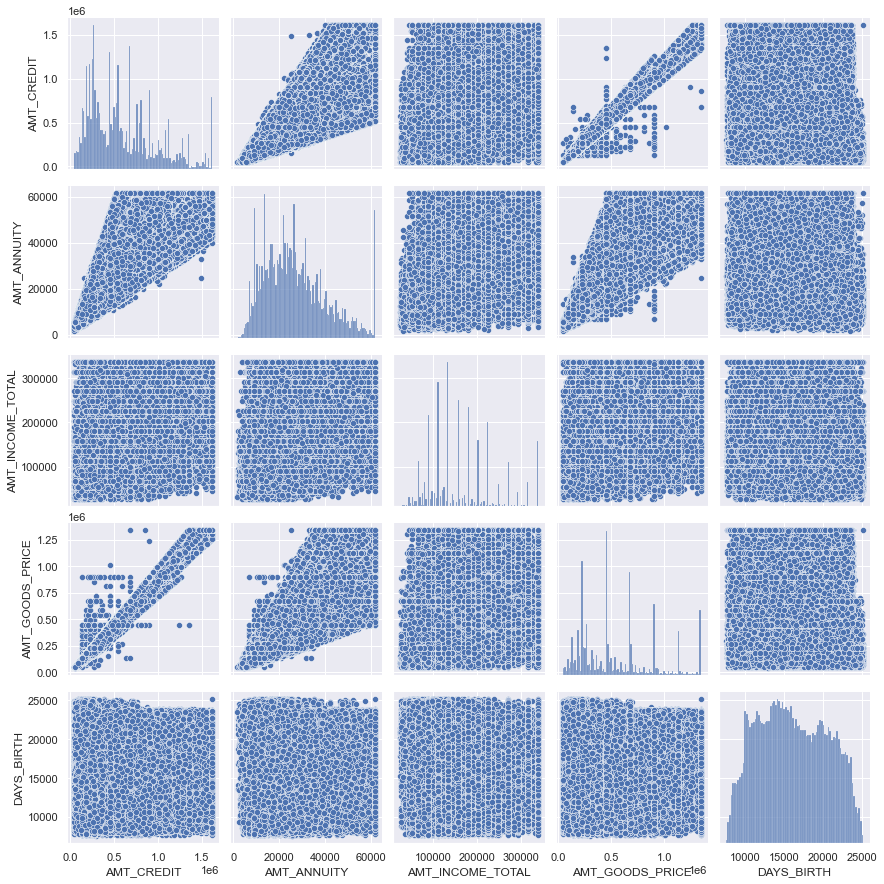

In [177]:
# pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']]
sns.pairplot(pair)
plt.show()

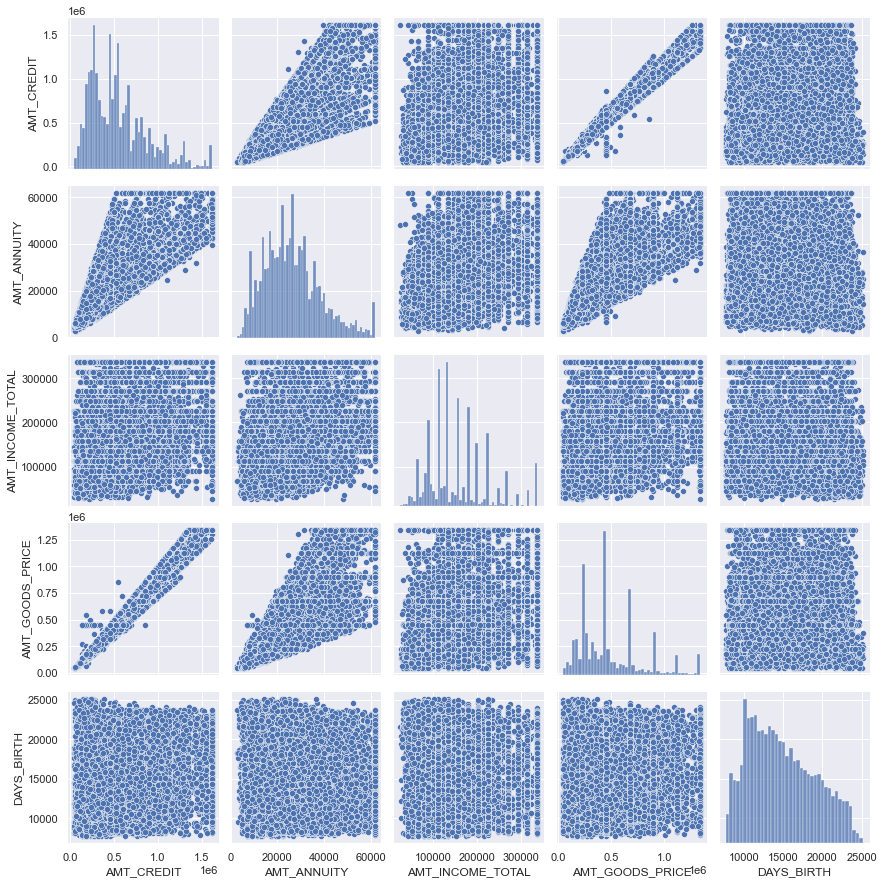

In [178]:
# pairplot for Target 1 (Loan-Payment Difficulties)
pair = target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']]
sns.pairplot(pair)
plt.show()

In [179]:
# Heatmap for Loan- Non Payment Difficulties
heat0 = target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT',]].corr(method = 'pearson')
heat0.iplot(kind = 'heatmap', colorscale = 'Blues', title = 'Correlation Heatmap of Loan- Non Payment Difficulties')

In [180]:
# Heatmap for Loan-Payment Difficulties
heat1 = target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT']].corr(method = 'pearson')
heat1.iplot(kind = 'heatmap', colorscale = 'Blues', title = 'Correlation Heatmap of Loan-Payment Difficulties')

#### We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

[Back to Contents](#contents)

<a id='summary'></a>

## Summary

### In this notebook, 
#### 1. We have analyzed the data, the number of numerical and categorial variables and also the summary statistics of the dataset.
#### 2. We have identified the errors in the data (negatives & XNAs) and corrected them.
#### 3. We have identified the null values (NaNs) in the data and imputed them with suitable values.
#### 4. We have analyzed the outliers and handled them effectively with suitable techniques.
#### 5. We have performed univariate and bivariate analysis on the numerical and categorical variables of the cleaned data.